************************************************************

#1- *SENTIMENT ANALYSIS*

## importing the packages

In [ ]:
!pip install pyarabic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from pyarabic.araby import tokenize
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from nltk.stem.isri import ISRIStemmer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from google.colab import data_table
data_table.enable_dataframe_formatter()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install farasa
!pip install farasapy
!git clone https://github.com/farisalasmary/psu-sentiment-analysis-session.git
!pip install flask-ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 31.5 MB/s eta 0:00:00
Cloning into 'psu-sentiment-analysis-session'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 44 (delta 14), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 23.18 MiB | 9.52 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
%cd psu-sentiment-analysis-session

/content/psu-sentiment-analysis-session


In [ ]:
!pip install git+https://github.com/user/farasa.git
!git clone https://github.com/farisalasmary/psu-sentiment-analysis-session.git

  Cloning https://github.com/user/farasa.git to /tmp/pip-req-build-zc2iph58
  Running command git clone --filter=blob:none --quiet https://github.com/user/farasa.git /tmp/pip-req-build-zc2iph58
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/user/farasa.git /tmp/pip-req-build-zc2iph58 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/user/farasa.git /tmp/pip-req-build-zc2iph58 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Cloning into 'psu-sentiment-analysis-session'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% 

In [ ]:
import aranorm
#import aranorm2

##*EDA

In [ ]:
data = pd.read_csv('/content/clean_tweets_2021-2024.csv')
data.head()

date                                          full_text  label
0  2021-03-01 07:46:25+00:00  أسعار الذهب ترتفع %1 بفعل ضعف الدولار وسط ترحي...      0
1  2021-03-01 07:58:09+00:00  استقرار أسعار الذهب في الصاغة.. وعيار 21 يسجل ...      0
2  2021-03-01 08:01:45+00:00  ارتفاع أسعار الذهب محليا 40 قرشا #عمون #ammonn...      0
3  2021-03-01 11:53:08+00:00  تحليل أسعار الذهب: لا يزال الإعداد الفني لزوج ...      1
4  2021-03-01 16:31:45+00:00  تحليل أسعار الذهب: توقعات زوج ذهب/دولار XAU/US...      1

In [ ]:
data.isnull().sum()

date         0
full_text    0
label        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       3158 non-null   object
 1   full_text  3158 non-null   object
 2   label      3158 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 74.1+ KB


In [ ]:
data.shape

(3158, 3)

In [ ]:
label_mapping = {0: 'Positive', 1: 'Negative'}
data['sentiment'] = data['label'].map(label_mapping)
data.head()

date                                          full_text  label sentiment
0  2021-03-01 07:46:25+00:00  أسعار الذهب ترتفع %1 بفعل ضعف الدولار وسط ترحي...      0  Positive
1  2021-03-01 07:58:09+00:00  استقرار أسعار الذهب في الصاغة.. وعيار 21 يسجل ...      0  Positive
2  2021-03-01 08:01:45+00:00  ارتفاع أسعار الذهب محليا 40 قرشا #عمون #ammonn...      0  Positive
3  2021-03-01 11:53:08+00:00  تحليل أسعار الذهب: لا يزال الإعداد الفني لزوج ...      1  Negative
4  2021-03-01 16:31:45+00:00  تحليل أسعار الذهب: توقعات زوج ذهب/دولار XAU/US...      1  Negative

In [ ]:
len(data[data['sentiment'] == 'Positive']), \
len(data[data['sentiment'] == 'Negative'])

(1763, 1395)

In [ ]:
df_1 =data.copy()

In [ ]:
positive_count=len(df_1[df_1['sentiment'] == 'Positive'])
negative_count=len(df_1[df_1['sentiment'] == 'Negative'])

In [ ]:
total_count = positive_count + negative_count

positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

print(f"Positive percentage: {positive_percentage:.2f}%")
print(f"Negative percentage: {negative_percentage:.2f}%")

Positive percentage: 55.83%
Negative percentage: 44.17%


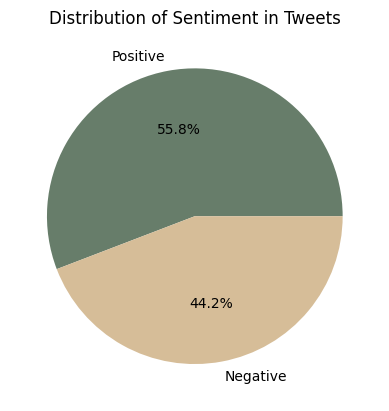

In [ ]:
data_dist = [positive_count,negative_count]

def show_pie_chart(data_dist):
    labels = ['Positive','Negative' ]
    colors = ['#677D6A', '#D6BD98']
    plt.pie(data_dist, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title('Distribution of Sentiment in Tweets')
    plt.show()


show_pie_chart(data_dist)

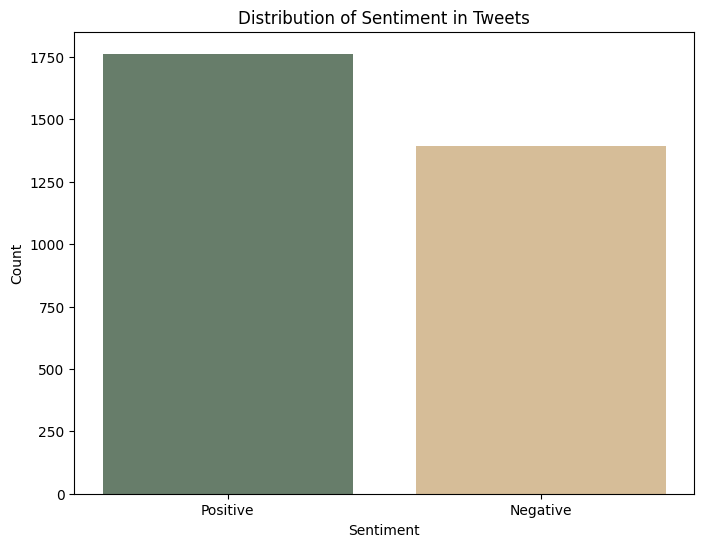

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = {'Positive': positive_count, 'Negative': negative_count}

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['#677D6A', '#D6BD98'])
plt.title('Distribution of Sentiment in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


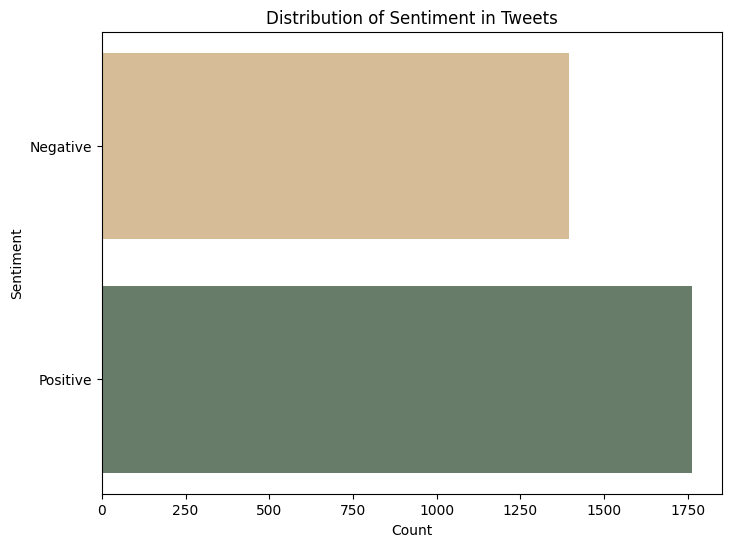

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(list(sentiment_counts.keys()), list(sentiment_counts.values()), color=['#677D6A', '#D6BD98'])
plt.title('Distribution of Sentiment in Tweets')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.show()

##*cleaning the data

In [ ]:
import re
import string
stop_words = set(stopwords.words('arabic'))

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")




WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text


def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email, '').strip()
    return ' '.join(text.split())

def replace_urls(text):
    text = re.sub(r"http\S+|www.\S+", "", text).strip()
    return ' '.join(text.split())

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    text = re.sub(r"\d{10}", "", text).strip()
    return ' '.join(text.split())

def remove_extra_spaces(text):
    return ' '.join(text.split())


'''
very important note:
    The order of the execution of the these function is extremely crucial.
'''

def normalize_tweet(text):
    #print(f"Original text: {text}")

    new_text = text.lower()
    new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    #print(f"Tokenized words: {tokens}")
    #print(f"Stemmed words: {stemmed_tokens}")

    return new_text

In [ ]:
data['clean_text'] = data['full_text'].apply(normalize_tweet)

In [ ]:
data['tokenized_text'] = data['clean_text'].apply(tokenize)

selected_columns = data[['date', 'full_text','label','clean_text', 'tokenized_text']]
selected_columns.head()

date                                          full_text  label                                         clean_text                                     tokenized_text
0  2021-03-01 07:46:25+00:00  أسعار الذهب ترتفع %1 بفعل ضعف الدولار وسط ترحي...      0  اسعار الذهب ترتفع بفعل ضعف الدولار وسط ترحيب ب...  [اسعار, الذهب, ترتفع, بفعل, ضعف, الدولار, وسط,...
1  2021-03-01 07:58:09+00:00  استقرار أسعار الذهب في الصاغة.. وعيار 21 يسجل ...      0  استقرار اسعار الذهب في الصاغه وعيار يسجل جنيها...  [استقرار, اسعار, الذهب, في, الصاغه, وعيار, يسج...
2  2021-03-01 08:01:45+00:00  ارتفاع أسعار الذهب محليا 40 قرشا #عمون #ammonn...      0                 ارتفاع اسعار الذهب محليا قرشا عمون          [ارتفاع, اسعار, الذهب, محليا, قرشا, عمون]
3  2021-03-01 11:53:08+00:00  تحليل أسعار الذهب: لا يزال الإعداد الفني لزوج ...      1  تحليل اسعار الذهب لا يزال الاعداد الفني لزوج ذ...  [تحليل, اسعار, الذهب, لا, يزال, الاعداد, الفني...
4  2021-03-01 16:31:45+00:00  تحليل أسعار الذهب: توقعات زوج ذهب/دولار XAU/US...      1  تحليل اسعار الذهب توقعات زوج ذهب دولار مدعومه ...  [تحليل, اسعار, الذهب, توقعات, زوج, ذهب, دولار,...

In [ ]:
arabic_stopwords = set(stopwords.words('arabic'))

words_to_exclude = {"ذهب"," مارس","صباح"}
custom_stopwords = arabic_stopwords - words_to_exclude


words_to_include = {"مثال","قرشا","على","لل","الي","دولارا","ليره","جنيها","علي","جنيهات","الدولار","ان","وقبل","وبعد","بعد","والتي","انج"}
custom_stopwords.update(words_to_include)

In [ ]:
def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]
    removed_tokens = [word for word in tokens if word in custom_stopwords]
    return filtered_tokens, removed_tokens




result = data['tokenized_text'].apply(remove_stopwords)
data['sentence_without_stopwords'] = result.apply(lambda x: ' '.join(x[0]))
data['removed_stopwords'] = result.apply(lambda x: ' '.join(x[1]))


selected_columns = data[['date', 'full_text','label', 'clean_text', 'tokenized_text', 'sentence_without_stopwords', 'removed_stopwords']]
selected_columns.head()

date                                          full_text  label                                         clean_text                                     tokenized_text                         sentence_without_stopwords removed_stopwords
0  2021-03-01 07:46:25+00:00  أسعار الذهب ترتفع %1 بفعل ضعف الدولار وسط ترحي...      0  اسعار الذهب ترتفع بفعل ضعف الدولار وسط ترحيب ب...  [اسعار, الذهب, ترتفع, بفعل, ضعف, الدولار, وسط,...  اسعار الذهب ترتفع بفعل ضعف وسط ترحيب بالتحفيز ...           الدولار
1  2021-03-01 07:58:09+00:00  استقرار أسعار الذهب في الصاغة.. وعيار 21 يسجل ...      0  استقرار اسعار الذهب في الصاغه وعيار يسجل جنيها...  [استقرار, اسعار, الذهب, في, الصاغه, وعيار, يسج...  استقرار اسعار الذهب الصاغه وعيار يسجل الذهب بن...          في جنيها
2  2021-03-01 08:01:45+00:00  ارتفاع أسعار الذهب محليا 40 قرشا #عمون #ammonn...      0                 ارتفاع اسعار الذهب محليا قرشا عمون          [ارتفاع, اسعار, الذهب, محليا, قرشا, عمون]                      ارتفاع اسعار الذهب محليا عمون              قرشا
3  2021-03-01 11:53:08+00:00  تحليل أسعار الذهب: لا يزال الإعداد الفني لزوج ...      1  تحليل اسعار الذهب لا يزال الاعداد الفني لزوج ذ...  [تحليل, اسعار, الذهب, لا, يزال, الاعداد, الفني...  تحليل اسعار الذهب يزال الاعداد الفني لزوج ذهب ...  لا دولار علي قبل
4  2021-03-01 16:31:45+00:00  تحليل أسعار الذهب: توقعات زوج ذهب/دولار XAU/US...      1  تحليل اسعار الذهب توقعات زوج ذهب دولار مدعومه ...  [تحليل, اسعار, الذهب, توقعات, زوج, ذهب, دولار,...  تحليل اسعار الذهب توقعات زوج ذهب مدعومه بارتفا...     دولار الدولار

In [ ]:
stemmer = ISRIStemmer()


def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

data['stemmed_tweets'] = data['sentence_without_stopwords'].apply(stem_text)

selected_columns_2 = data[['date','full_text', 'label', 'clean_text', 'tokenized_text', 'removed_stopwords', 'sentence_without_stopwords', 'stemmed_tweets']]
selected_columns_2.head()

date                                          full_text  label                                         clean_text                                     tokenized_text removed_stopwords                         sentence_without_stopwords                                     stemmed_tweets
0  2021-03-01 07:46:25+00:00  أسعار الذهب ترتفع %1 بفعل ضعف الدولار وسط ترحي...      0  اسعار الذهب ترتفع بفعل ضعف الدولار وسط ترحيب ب...  [اسعار, الذهب, ترتفع, بفعل, ضعف, الدولار, وسط,...           الدولار  اسعار الذهب ترتفع بفعل ضعف وسط ترحيب بالتحفيز ...        سعر ذهب رفع فعل ضعف وسط رحب حفز امر لزم خصص
1  2021-03-01 07:58:09+00:00  استقرار أسعار الذهب في الصاغة.. وعيار 21 يسجل ...      0  استقرار اسعار الذهب في الصاغه وعيار يسجل جنيها...  [استقرار, اسعار, الذهب, في, الصاغه, وعيار, يسج...          في جنيها  استقرار اسعار الذهب الصاغه وعيار يسجل الذهب بن...                قرر سعر ذهب صغه عير سجل ذهب بنك مصر
2  2021-03-01 08:01:45+00:00  ارتفاع أسعار الذهب محليا 40 قرشا #عمون #ammonn...      0                 ارتفاع اسعار الذهب محليا قرشا عمون          [ارتفاع, اسعار, الذهب, محليا, قرشا, عمون]              قرشا                      ارتفاع اسعار الذهب محليا عمون                                رفع سعر ذهب محل عمن
3  2021-03-01 11:53:08+00:00  تحليل أسعار الذهب: لا يزال الإعداد الفني لزوج ...      1  تحليل اسعار الذهب لا يزال الاعداد الفني لزوج ذ...  [تحليل, اسعار, الذهب, لا, يزال, الاعداد, الفني...  لا دولار علي قبل  تحليل اسعار الذهب يزال الاعداد الفني لزوج ذهب ...  حلل سعر ذهب يزل عدد فني لزج ذهب صلح ضرب خفض ءش...
4  2021-03-01 16:31:45+00:00  تحليل أسعار الذهب: توقعات زوج ذهب/دولار XAU/US...      1  تحليل اسعار الذهب توقعات زوج ذهب دولار مدعومه ...  [تحليل, اسعار, الذهب, توقعات, زوج, ذهب, دولار,...     دولار الدولار  تحليل اسعار الذهب توقعات زوج ذهب مدعومه بارتفا...  حلل سعر ذهب وقع زوج ذهب دعم رفع ضخم ضعف امر ذه...

In [ ]:
df = selected_columns_2.copy()

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.date

In [ ]:
df.columns

Index(['date', 'full_text', 'label', 'clean_text', 'tokenized_text', 'removed_stopwords', 'sentence_without_stopwords', 'stemmed_tweets'], dtype='object')

In [ ]:
df = df.drop(['full_text','clean_text','tokenized_text','sentence_without_stopwords','removed_stopwords'], axis=1)
df.head(10)

date  label                                     stemmed_tweets
0  2021-03-01      0        سعر ذهب رفع فعل ضعف وسط رحب حفز امر لزم خصص
1  2021-03-01      0                قرر سعر ذهب صغه عير سجل ذهب بنك مصر
2  2021-03-01      0                                رفع سعر ذهب محل عمن
3  2021-03-01      1  حلل سعر ذهب يزل عدد فني لزج ذهب صلح ضرب خفض ءش...
4  2021-03-01      1  حلل سعر ذهب وقع زوج ذهب دعم رفع ضخم ضعف امر ذه...
5  2021-03-02      1  لسا نزل نفط رفع ذهب عكس نزل وده شري ذهب لسا صب...
6  2021-03-02      1  ذهب هبط يصل ستو ونص تضرر عفي كسب سهم ذهب سعر ذ...
7  2021-03-04      1  شتر ذهب جهل هبط سعر ذهب لقل ستي شهر رفع سند خز...
8  2021-03-06      1                                   يرب تحر سهم زورد
9  2021-03-08      0                        رفع سعر ذهب ادن ستي شهر ذهب

In [ ]:
df.to_csv('label_steamed_data.csv', index=False)

##*models

In [ ]:
X = df['stemmed_tweets']
y = df['label']

#training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
X_train.shape

(2526,)

In [ ]:
X_test.shape

(316,)

In [ ]:
X_val.shape

(316,)

###-naive bayes

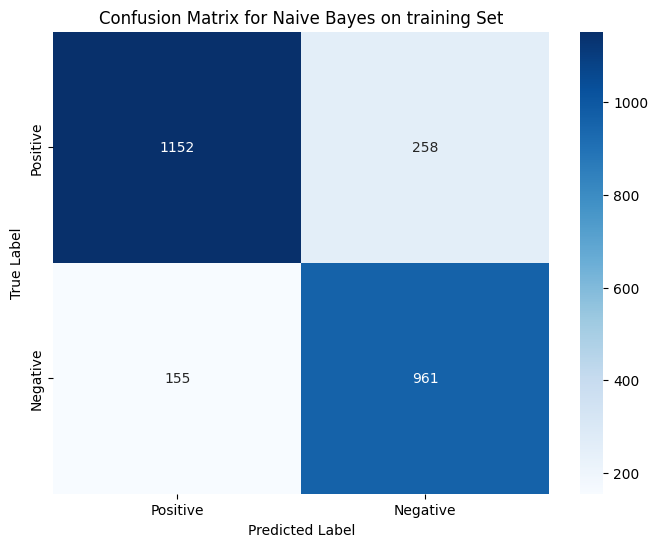

(      Metric     Score
 0  Precision  0.881408
 1     Recall  0.817021
 2   F1 Score  0.847994
 3   Accuracy  0.836500,
 array([[1152,  258],
        [ 155,  961]]))

In [ ]:
nb_model = MultinomialNB(alpha=1.0)

nb_model.fit(X_train_tfidf, y_train)

y_train_pred_nb = nb_model.predict(X_train_tfidf)

precision_nb_train = precision_score(y_train, y_train_pred_nb, pos_label=0)
recall_nb_train = recall_score(y_train, y_train_pred_nb, pos_label=0)
f1_nb_train = f1_score(y_train, y_train_pred_nb, pos_label=0)
accuracy_nb_train = accuracy_score(y_train, y_train_pred_nb)
conf_matrix_nb_train = confusion_matrix(y_train, y_train_pred_nb)

metrics_nb_train = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_nb_train, recall_nb_train, f1_nb_train, accuracy_nb_train]
})

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes on training Set')
plt.show()

y_test_pred_nb = nb_model.predict(X_test_tfidf)

metrics_nb_train, conf_matrix_nb_train

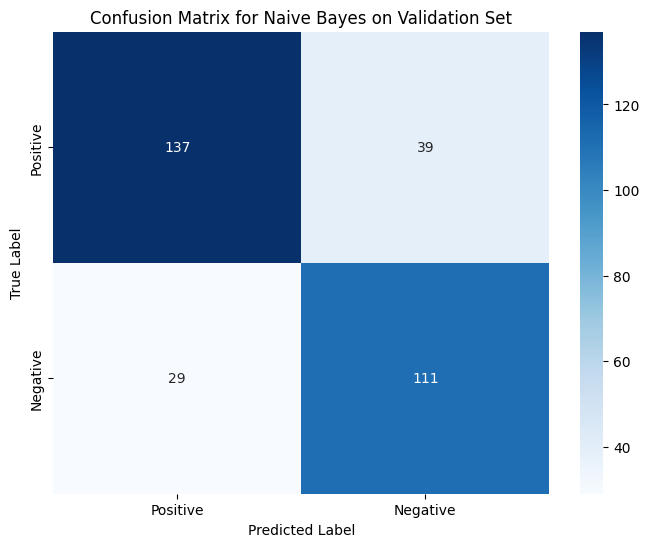

(      Metric     Score
 0  Precision  0.825301
 1     Recall  0.778409
 2   F1 Score  0.801170
 3   Accuracy  0.784810,
 array([[137,  39],
        [ 29, 111]]))

In [ ]:
y_val_pred_nb = nb_model.predict(X_val_tfidf)

precision_nb = precision_score(y_val, y_val_pred_nb, pos_label=0)
recall_nb = recall_score(y_val, y_val_pred_nb, pos_label=0)
f1_nb = f1_score(y_val, y_val_pred_nb, pos_label=0)
accuracy_nb = accuracy_score(y_val, y_val_pred_nb)
conf_matrix_nb = confusion_matrix(y_val, y_val_pred_nb)

metrics_nb_val = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_nb, recall_nb, f1_nb, accuracy_nb]
})

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes on Validation Set')
plt.show()
metrics_nb_val, conf_matrix_nb

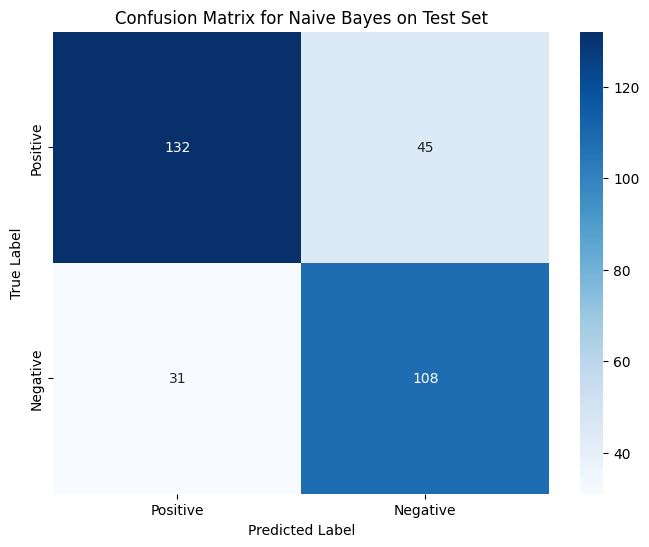

(      Metric     Score
 0  Precision  0.809816
 1     Recall  0.745763
 2   F1 Score  0.776471
 3   Accuracy  0.759494,
 array([[132,  45],
        [ 31, 108]]))

In [ ]:
y_test_pred_nb = nb_model.predict(X_test_tfidf)

test_precision_nb = precision_score(y_test, y_test_pred_nb, pos_label=0)
test_recall_nb = recall_score(y_test, y_test_pred_nb, pos_label=0)
test_f1_nb = f1_score(y_test, y_test_pred_nb, pos_label=0)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)

test_metrics_nb = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [test_precision_nb, test_recall_nb, test_f1_nb, test_accuracy_nb]
})


plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes on Test Set')
plt.show()

test_metrics_nb, test_conf_matrix_nb

In [ ]:
#feature_names = tfidf.get_feature_names_out()
#log_probabilities = nb_model.feature_log_prob_[1]

#feature_importance_df_nb = pd.DataFrame({
#    'Feature': feature_names,
#    'Importance': log_probabilities
#})

#feature_importance_df_nb = feature_importance_df_nb.sort_values(by='Importance', ascending=False)

#top_features_nb = feature_importance_df_nb.head(20)

#top_features_nb.reset_index(drop=True, inplace=True)

#top_features_nb.head()

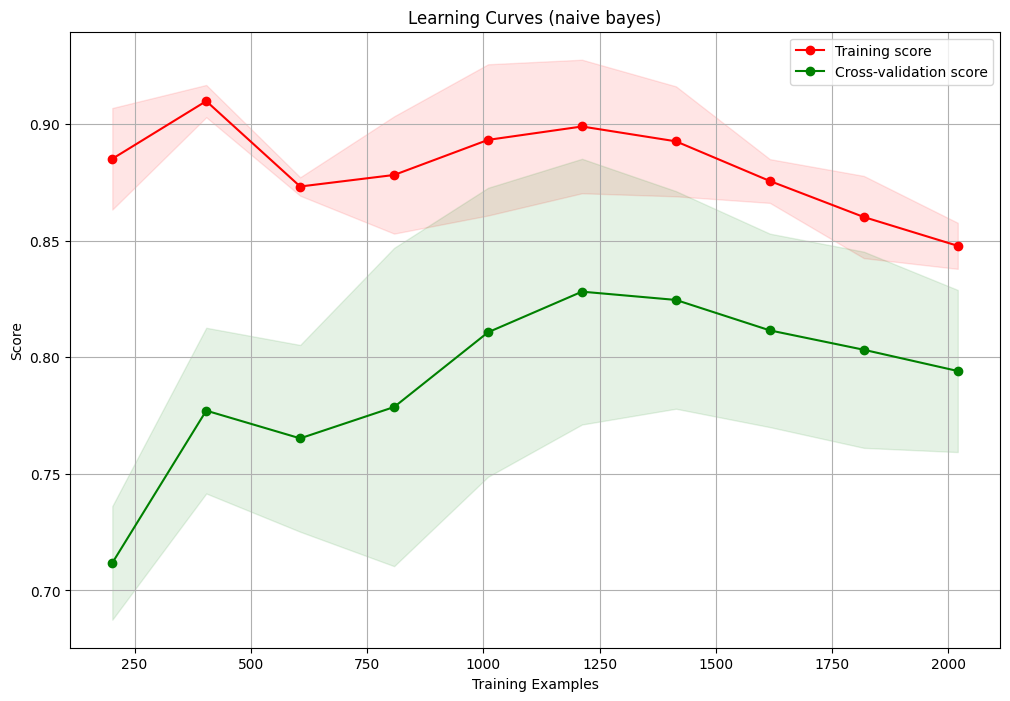

In [ ]:
# learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    nb_model, X_train_tfidf, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title('Learning Curves (naive bayes)')
plt.show()

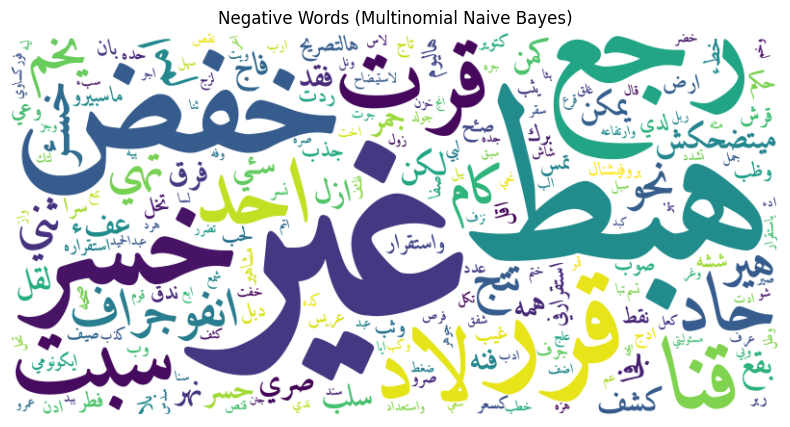

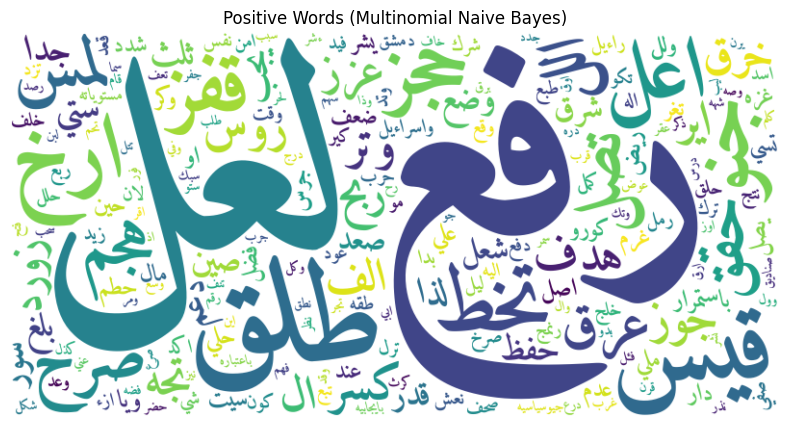

In [ ]:
y_train = df['label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df['stemmed_tweets'])
feature_names = np.array(vectorizer.get_feature_names_out())

nb_model = MultinomialNB(alpha=1.0)

nb_model.fit(X_train_tfidf, y_train)

y_train_pred = nb_model.predict(X_train_tfidf)

precision_train = precision_score(y_train, y_train_pred, pos_label=0)
recall_train = recall_score(y_train, y_train_pred, pos_label=0)
f1_train = f1_score(y_train, y_train_pred, pos_label=0)
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

metrics_train = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_train, recall_train, f1_train, accuracy_train]
})


log_prob_diff = nb_model.feature_log_prob_[1] - nb_model.feature_log_prob_[0]

negative_words_nb = {feature_names[i]: log_prob_diff[i] for i in range(len(log_prob_diff)) if log_prob_diff[i] > 0}
positive_words_nb = {feature_names[i]: -log_prob_diff[i] for i in range(len(log_prob_diff)) if log_prob_diff[i] < 0}


arabic_font_path = '/content/Amiri-BoldItalic (1).ttf'


def generate_wordcloud(word_dict, title, font_path):
    if word_dict:
        wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_dict)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"No words to display for {title}")


generate_wordcloud(negative_words_nb, 'Negative Words (Multinomial Naive Bayes)', arabic_font_path)
generate_wordcloud(positive_words_nb, 'Positive Words (Multinomial Naive Bayes)', arabic_font_path)

###SVM

In [ ]:
X = df['stemmed_tweets']
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

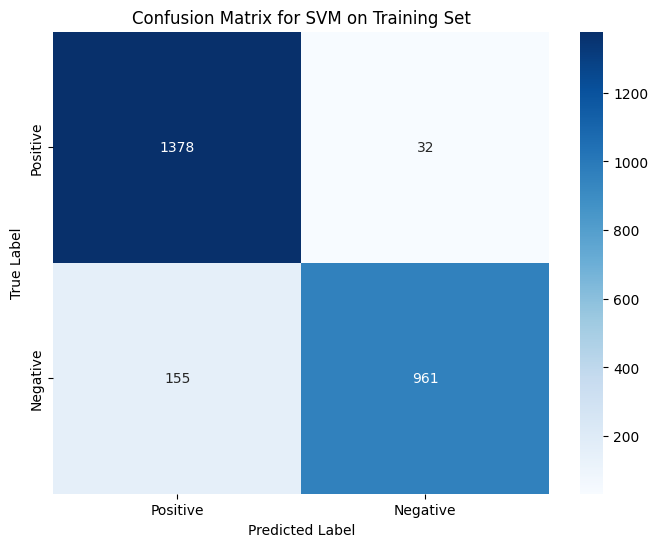

(      Metric     Score
 0  Precision  0.898891
 1     Recall  0.977305
 2   F1 Score  0.936459
 3   Accuracy  0.925970,
 array([[1378,   32],
        [ 155,  961]]))

In [ ]:
svm_model = SVC(
    C=0.1,
    kernel='linear',
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_tfidf, y_train)

y_train_pred_svm = svm_model.predict(X_train_tfidf)

precision_svm_train = precision_score(y_train, y_train_pred_svm, pos_label=0)
recall_svm_train = recall_score(y_train, y_train_pred_svm, pos_label=0)
f1_svm_train = f1_score(y_train, y_train_pred_svm, pos_label=0)
accuracy_svm_train = accuracy_score(y_train, y_train_pred_svm)
conf_matrix_svm_train = confusion_matrix(y_train, y_train_pred_svm)

metrics_svm_train = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_svm_train, recall_svm_train, f1_svm_train, accuracy_svm_train]
})

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM on Training Set')
plt.show()

metrics_svm_train, conf_matrix_svm_train

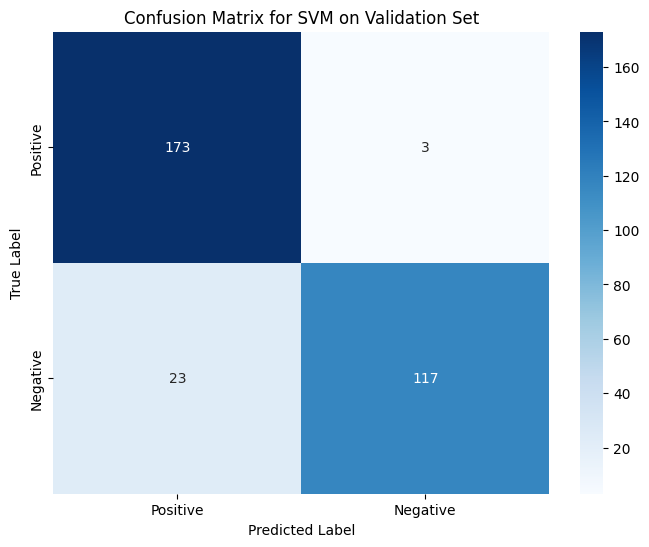

(      Metric     Score
 0  Precision  0.882653
 1     Recall  0.982955
 2   F1 Score  0.930108
 3   Accuracy  0.917722,
 array([[173,   3],
        [ 23, 117]]))

In [ ]:
y_val_pred_svm = svm_model.predict(X_val_tfidf)

precision_svm_val = precision_score(y_val, y_val_pred_svm, pos_label=0)
recall_svm_val = recall_score(y_val, y_val_pred_svm, pos_label=0)
f1_svm_val = f1_score(y_val, y_val_pred_svm, pos_label=0)
accuracy_svm_val = accuracy_score(y_val, y_val_pred_svm)
conf_matrix_svm_val = confusion_matrix(y_val, y_val_pred_svm)

metrics_svm_val = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_svm_val, recall_svm_val, f1_svm_val, accuracy_svm_val]
})


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM on Validation Set')
plt.show()

metrics_svm_val, conf_matrix_svm_val

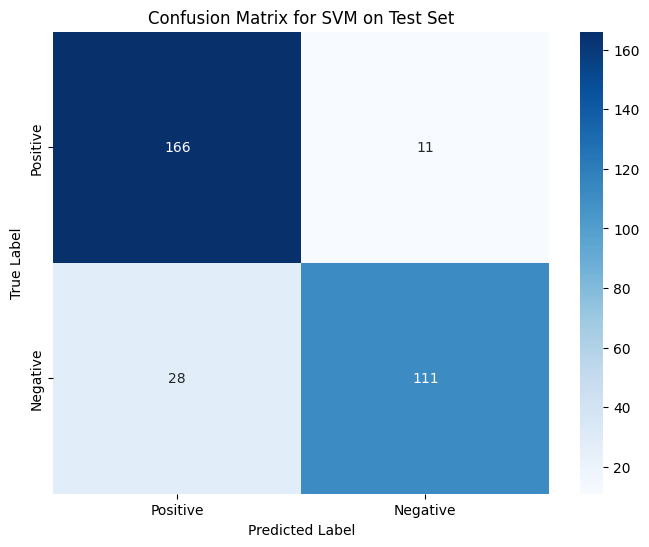

(      Metric     Score
 0  Precision  0.855670
 1     Recall  0.937853
 2   F1 Score  0.894879
 3   Accuracy  0.876582,
 array([[166,  11],
        [ 28, 111]]))

In [ ]:
y_test_pred_svm = svm_model.predict(X_test_tfidf)


test_precision_svm = precision_score(y_test, y_test_pred_svm, pos_label=0)
test_recall_svm = recall_score(y_test, y_test_pred_svm, pos_label=0)
test_f1_svm = f1_score(y_test, y_test_pred_svm, pos_label=0)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)


test_metrics_svm = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [test_precision_svm, test_recall_svm, test_f1_svm, test_accuracy_svm]
})


plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM on Test Set')
plt.show()

test_metrics_svm, test_conf_matrix_svm

In [ ]:
coefficients = svm_model.coef_.toarray().flatten()
feature_names = tfidf.get_feature_names_out()


feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
top_features = feature_importance.head(10)

top_features.reset_index(drop=True, inplace=True)


top_features

Feature  Coefficient  Absolute Coefficient
0     رفع    -4.721396              4.721396
1     خفض     3.345131              3.345131
2     رجع     3.189496              3.189496
3     هبط     3.061129              3.061129
4     قرر     2.275526              2.275526
5     غير     2.010011              2.010011
6     سعر     1.008490              1.008490
7     صعد    -0.926482              0.926482
8     قفز    -0.877997              0.877997
9     اعل    -0.653468              0.653468

In [ ]:
# Plot the top 20 important features
#plt.figure(figsize=(10, 8))
#sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(20))
#plt.title('Top 20 Important Features for SVM Model')
#plt.xlabel('Coefficient')
#plt.ylabel('Feature')
#plt.show()

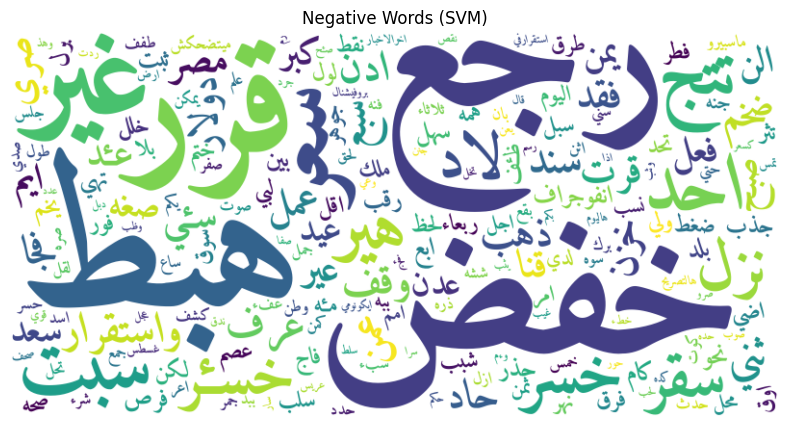

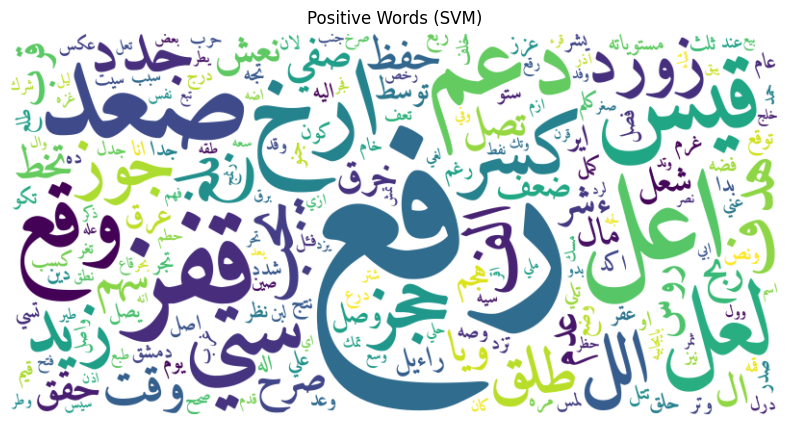

In [ ]:
y_train = df['label']
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df['stemmed_tweets'])
feature_names = np.array(vectorizer.get_feature_names_out())

svm_model = SVC(
    C=0.1,
    kernel='linear',
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_tfidf, y_train)

y_train_pred = svm_model.predict(X_train_tfidf)

precision_train = precision_score(y_train, y_train_pred, pos_label=0)
recall_train = recall_score(y_train, y_train_pred, pos_label=0)
f1_train = f1_score(y_train, y_train_pred, pos_label=0)
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

metrics_train = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_train, recall_train, f1_train, accuracy_train]
})

svm_coefficients = svm_model.coef_.toarray().flatten()

negative_words_svm = {feature_names[i]: svm_coefficients[i] for i in range(len(svm_coefficients)) if svm_coefficients[i] > 0}
positive_words_svm = {feature_names[i]: -svm_coefficients[i] for i in range(len(svm_coefficients)) if svm_coefficients[i] < 0}

def generate_wordcloud(word_dict, title, font_path=None):
    if word_dict:
        wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_dict)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"No words to display for {title}")

arabic_font_path = '/content/Amiri-BoldItalic (1).ttf'

generate_wordcloud(negative_words_svm, 'Negative Words (SVM)', arabic_font_path)
generate_wordcloud(positive_words_svm, 'Positive Words (SVM)', arabic_font_path)

###-soft_voting model

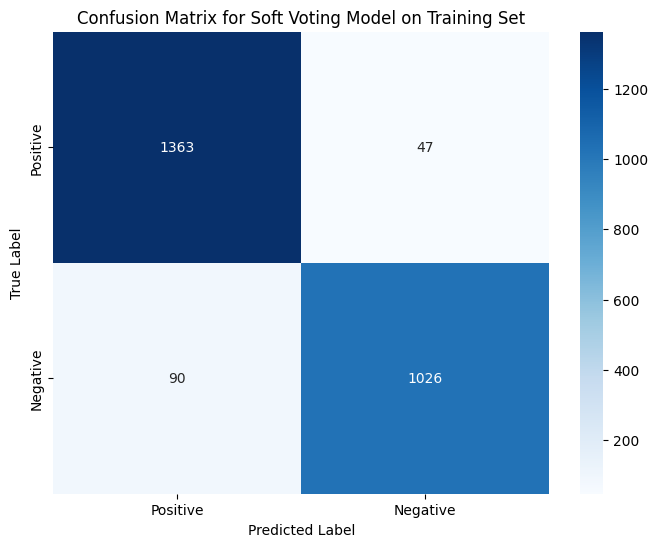

(      Metric     Score
 0  Precision  0.938059
 1     Recall  0.966667
 2   F1 Score  0.952148
 3   Accuracy  0.945764,
 array([[1363,   47],
        [  90, 1026]]))

In [ ]:
X = df['stemmed_tweets']
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)


nb_model = MultinomialNB(alpha=1.0)

svm_model = SVC(
    C=0.1,
    kernel='linear',
    gamma='scale',
    probability=True,
    random_state=42
)

voting_model = VotingClassifier(
    estimators=[
        ('nb', nb_model),
        ('svm', svm_model)
    ],
    voting='soft'
)

voting_model.fit(X_train_tfidf, y_train)

y_train_pred_voting = voting_model.predict(X_train_tfidf)

precision_voting_train = precision_score(y_train, y_train_pred_voting, pos_label=0)
recall_voting_train = recall_score(y_train, y_train_pred_voting, pos_label=0)
f1_voting_train = f1_score(y_train, y_train_pred_voting, pos_label=0)
accuracy_voting_train = accuracy_score(y_train, y_train_pred_voting)
conf_matrix_voting_train = confusion_matrix(y_train, y_train_pred_voting)

metrics_voting_train = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_voting_train, recall_voting_train, f1_voting_train, accuracy_voting_train]
})

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Soft Voting Model on Training Set')
plt.show()

metrics_voting_train, conf_matrix_voting_train

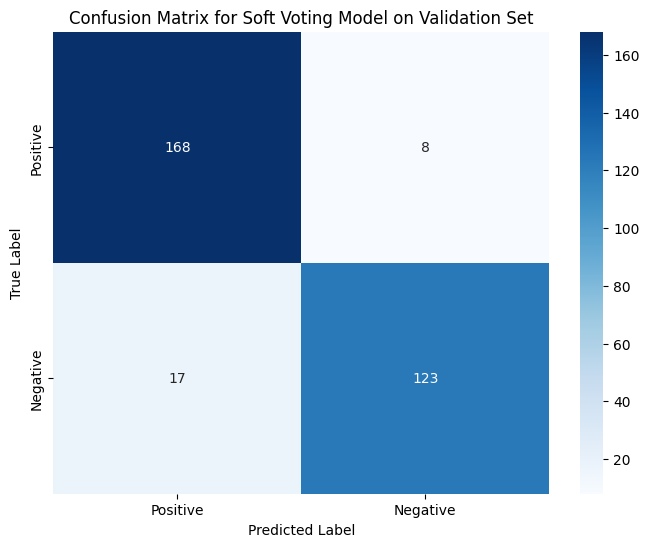

(      Metric     Score
 0  Precision  0.908108
 1     Recall  0.954545
 2   F1 Score  0.930748
 3   Accuracy  0.920886,
 array([[168,   8],
        [ 17, 123]]))

In [ ]:
y_val_pred_voting = voting_model.predict(X_val_tfidf)

precision_voting_val = precision_score(y_val, y_val_pred_voting, pos_label=0)
recall_voting_val = recall_score(y_val, y_val_pred_voting, pos_label=0)
f1_voting_val = f1_score(y_val, y_val_pred_voting, pos_label=0)
accuracy_voting_val = accuracy_score(y_val, y_val_pred_voting)
conf_matrix_voting_val = confusion_matrix(y_val, y_val_pred_voting)

metrics_voting_val = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision_voting_val, recall_voting_val, f1_voting_val, accuracy_voting_val]
})

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Soft Voting Model on Validation Set')
plt.show()

metrics_voting_val, conf_matrix_voting_val


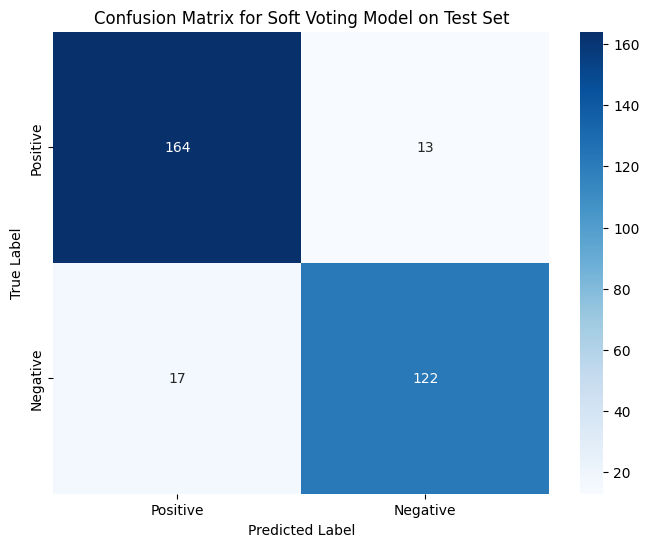

(      Metric     Score
 0  Precision  0.906077
 1     Recall  0.926554
 2   F1 Score  0.916201
 3   Accuracy  0.905063,
 array([[164,  13],
        [ 17, 122]]))

In [ ]:
y_test_pred_voting = voting_model.predict(X_test_tfidf)

test_precision_voting = precision_score(y_test, y_test_pred_voting, pos_label=0)
test_recall_voting = recall_score(y_test, y_test_pred_voting, pos_label=0)
test_f1_voting = f1_score(y_test, y_test_pred_voting, pos_label=0)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
test_conf_matrix_voting = confusion_matrix(y_test, y_test_pred_voting)

test_metrics_voting = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [test_precision_voting, test_recall_voting, test_f1_voting, test_accuracy_voting]
})

plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Soft Voting Model on Test Set')
plt.show()

test_metrics_voting, test_conf_matrix_voting

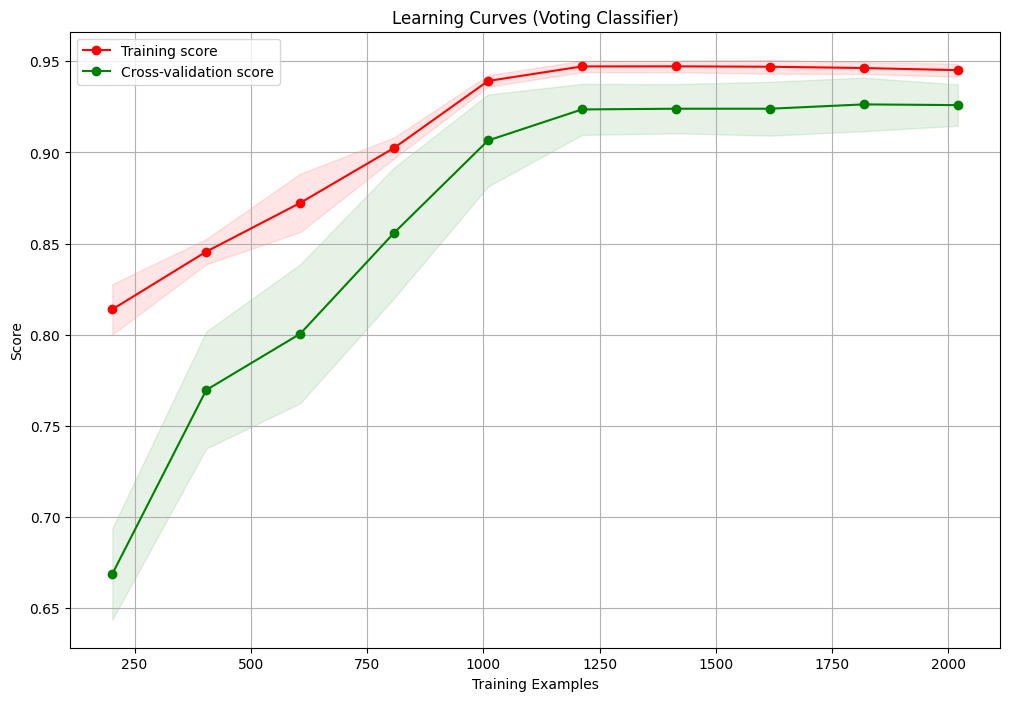

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    voting_model, X_train_tfidf, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title('Learning Curves (Voting Classifier)')
plt.show()

###compare the results

In [ ]:
import pandas as pd
results = []

results.append({
    'Model': 'SVM',
    'Training Accuracy': 0.92,
    'Training F1-Score': 0.93,
    'Test Accuracy': 0.87,
    'Test F1-Score': 0.89
})


results.append({
    'Model': 'Multinomial NB',
    'Training Accuracy': 0.83,
    'Training F1-Score': 0.84,
    'Test Accuracy': 0.75,
    'Test F1-Score': 0.77
})


results.append({
    'Model': 'Voting Classifier',
    'Training Accuracy': 0.94,
    'Training F1-Score': 0.95,
    'Test Accuracy': 0.90,
    'Test F1-Score': 0.91
})

results_df = pd.DataFrame(results)

results_df.head()

Model  Training Accuracy  Training F1-Score  Test Accuracy  \
0                SVM               0.92               0.93           0.87   
1     Multinomial NB               0.83               0.84           0.75   
2  Voting Classifier               0.94               0.95           0.90   

   Test F1-Score  
0           0.89  
1           0.77  
2           0.91

In [ ]:
results = []

results.append({
    'Model': 'SVM',
    'Test Accuracy': 0.87,
    'Test F1-Score': 0.89
})


results.append({
    'Model': 'Multinomial NB',
    'Test Accuracy': 0.75,
    'Test F1-Score': 0.77
})


results.append({
    'Model': 'Voting Classifier',
    'Test Accuracy': 0.90,
    'Test F1-Score': 0.91
})

results_df = pd.DataFrame(results)

results_df.head()

Model  Test Accuracy  Test F1-Score
0                SVM           0.87           0.89
1     Multinomial NB           0.75           0.77
2  Voting Classifier           0.90           0.91

In [ ]:
example_text = [" سعر الذهب اليوم مرتفع جدا  "]

example_tfidf = tfidf.transform(example_text)

predicted_label = voting_model.predict(example_tfidf)
predicted_probabilities = voting_model.predict_proba(example_tfidf)

sentiment_mapping = {0: 'Positive', 1: 'Negative'}
predicted_sentiment = sentiment_mapping[predicted_label[0]]

predicted_sentiment, predicted_probabilities


('Positive', array([[0.8233515, 0.1766485]]))

##*preparing the tweet for the LSTM model

In [ ]:
df.tail()

date  label                                      Stemmed Words
3153  2024-04-17      1                                    قرر سعر ذهب علم
3154  2024-04-17      1                                قرر سعر ذهب علم سبل
3155  2024-04-17      1  نقب محل حلي جوهر وقع خفض سعر ذهب خلل صيف قبل ا...
3156  2024-04-17      1  قرت سعر ذهب اليوم ربعاء رفع الي ستي قيس سبع اض...
3157  2024-04-17      1              عجل علم قرر سعر ذهب رفع دولار عءد سند

In [ ]:
df_2 = df.copy()

In [ ]:
df_2['date'] = pd.to_datetime(df_2['date'], errors='coerce')

df_2 = df_2.dropna(subset=['date'])

df_2['date_only'] = df_2['date'].dt.date

def find_dominant_score(group):
    dominant_score = group['label'].value_counts().idxmax()
    return pd.Series({'dominant_score': dominant_score})

dominant_scores = df_2.groupby('date_only').apply(find_dominant_score).reset_index()

dominant_scores.columns = ['date', 'dominant_score']


dominant_scores.head()

<ipython-input-128-5a89134ad139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['date_only'] = df_2['date'].dt.date


date  dominant_score
0  2021-03-01               0
1  2021-03-02               1
2  2021-03-04               1
3  2021-03-06               1
4  2021-03-08               0

In [ ]:
dominant_scores.shape

(817, 2)

In [ ]:
dominant_scores.to_csv('tweet_score.csv', index=False)

In [ ]:
len(dominant_scores[dominant_scores['dominant_score'] == 0]), \
len(dominant_scores[dominant_scores['dominant_score'] == 1])

(390, 427)

#***********************************************************

************************************************************

************************************************************

# 2-  *Historical Data*

## import the packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## importing the data

In [ ]:
import pandas as pd


gold_df = pd.read_csv('/content/Gold.csv')
exchange_rate_df = pd.read_csv('/content/Exchnage_rate.csv')
petrochemical_df = pd.read_csv('/content/Petrochemical.csv')
oil_df = pd.read_csv('/content/Oil.csv')
Inflation_df = pd.read_csv('/content/Inflation.csv')


gold_df_selected = gold_df[['Date', 'Gold']]
exchange_rate_df_selected = exchange_rate_df[['Date', 'Exchnage_rate']]
petrochemical_df_selected = petrochemical_df[['Date', 'Petrochemical']]
oil_df_selected = oil_df[['Date', 'Oil']]
Inflation_df_selected = Inflation_df[['Date', 'Inflation']]


merged_df = gold_df_selected.merge(Inflation_df_selected, on='Date', how='left')
merged_df = merged_df.merge(exchange_rate_df_selected, on='Date', how='left')
merged_df = merged_df.merge(petrochemical_df_selected, on='Date', how='left')
merged_df = merged_df.merge(oil_df_selected, on='Date', how='left')

In [ ]:
merged_df.head()

Date       Gold Inflation  Exchnage_rate  Petrochemical        Oil
0  3/1/2021  17.433332     0.40%       3.750000      69.900002  28.429752
1  3/2/2021  17.500000    -0.40%       3.746846      69.699997  28.471073
2  3/3/2021  17.299999    -0.58%       3.746639      69.500000  28.471073
3  3/4/2021  17.233334    -1.33%       3.747313      69.900002  28.925619
4  3/7/2021  17.066666     0.76%            NaN      69.400002  29.214876

In [ ]:
merged_df.tail()

Date       Gold Inflation  Exchnage_rate  Petrochemical        Oil
764  3/24/2024  52.900002    -0.38%            NaN      37.799999  31.250000
765  3/25/2024  51.900002    -2.69%       3.746232      37.599998  31.200001
766  3/26/2024  50.400002    -1.19%       3.746055      37.500000  30.900000
767  3/27/2024  50.000000     3.00%       3.745938      36.900002  30.900000
768  3/28/2024  51.599998    -1.94%       3.746052      37.000000  30.950001

In [ ]:
merged_df.isnull().sum()

Date               0
Gold               0
Inflation          0
Exchnage_rate    153
Petrochemical      0
Oil                0
dtype: int64

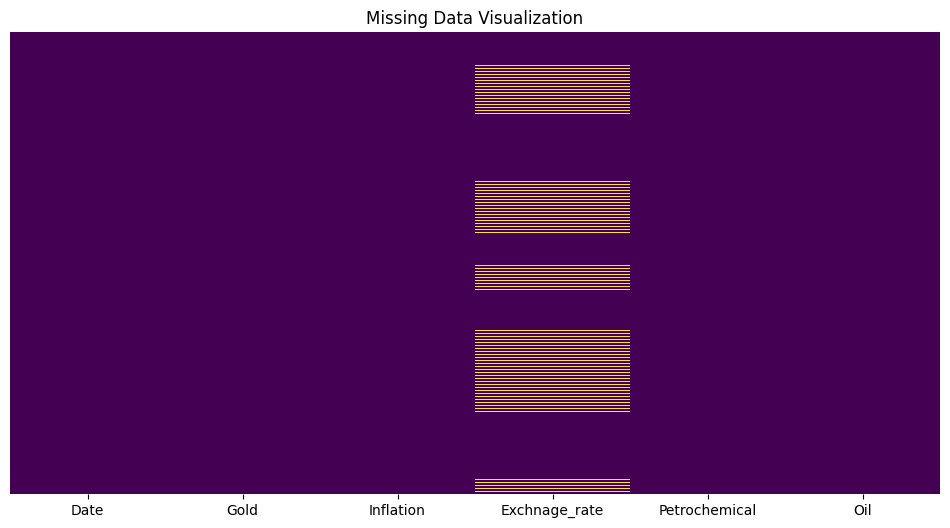

In [ ]:
plt.figure(figsize=(12, 6))

sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Data Visualization')
plt.show()

In [ ]:
print(merged_df.dtypes)
merged_df['Inflation'] = merged_df['Inflation'].astype(str)
merged_df['Inflation'] = merged_df['Inflation'].str.rstrip('%').astype(float) / 100

Date                     datetime64[ns]
Gold                            float64
Inflation                        object
Exchnage_rate                   float64
Petrochemical                   float64
Oil                             float64
missing_exchange_rate             int64
dtype: object


##merge the data

In [ ]:
data= merged_df.copy()

In [ ]:
data_5= pd.read_csv('/content/tweet_score_2021-2024.csv')

In [ ]:
data_5.head()

Date  dominant_score
0  3/1/2021               0
1  3/2/2021               1
2  3/4/2021               1
3  3/6/2021               1
4  3/8/2021               0

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data_5['Date'] = pd.to_datetime(data_5['Date'])


data['Date'] = data['Date'].astype('datetime64[ns]')
data_5['Date'] = data_5['Date'].astype('datetime64[ns]')

merged_data = pd.merge(data, data_5[['Date', 'dominant_score']], on='Date', how='left')


merged_data.head()

Date       Gold  Inflation  Exchnage_rate  Petrochemical        Oil  \
0 2021-03-01  17.433332     0.0040       3.750000      69.900002  28.429752   
1 2021-03-02  17.500000    -0.0040       3.746846      69.699997  28.471073   
2 2021-03-03  17.299999    -0.0058       3.746639      69.500000  28.471073   
3 2021-03-04  17.233334    -0.0133       3.747313      69.900002  28.925619   
4 2021-03-07  17.066666     0.0076            NaN      69.400002  29.214876   

   missing_exchange_rate  dominant_score  
0                      0             0.0  
1                      0             1.0  
2                      0             NaN  
3                      0             1.0  
4                      1             NaN

In [ ]:
merged_data.isnull().sum()

Date                       0
Gold                       0
Inflation                  0
Exchnage_rate            153
Petrochemical              0
Oil                        0
missing_exchange_rate      0
dominant_score           220
dtype: int64

In [ ]:
merged_data.to_csv('missing_values.csv')

<ipython-input-24-9d47835adbb1>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  missing_trend = merged_data.set_index('Date').resample('M').mean()


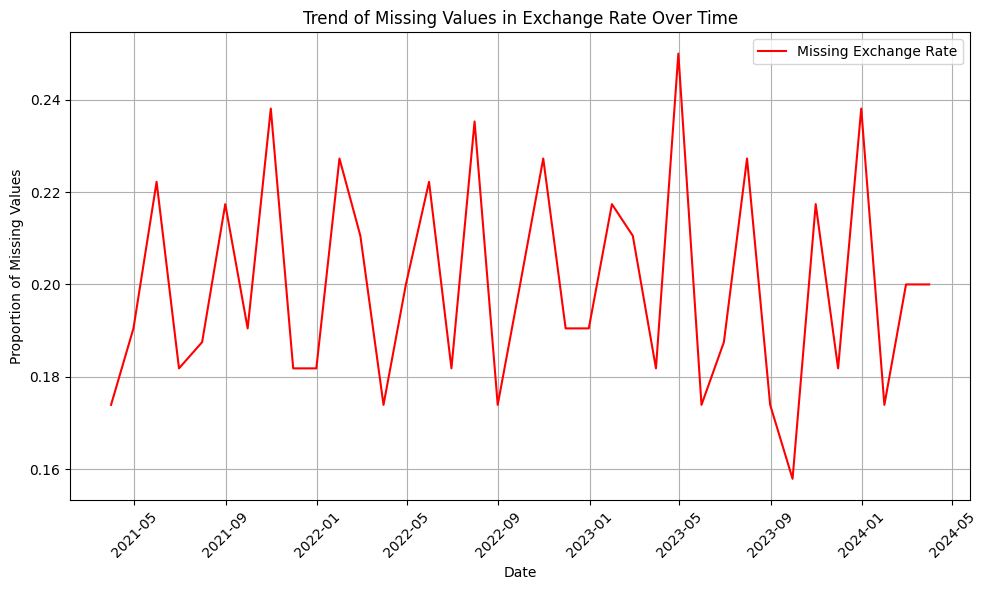

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%Y-%m-%d')

merged_data['missing_exchange_rate'] = merged_data['Exchnage_rate'].isnull().astype(int)

missing_trend = merged_data.set_index('Date').resample('M').mean()

plt.figure(figsize=(10, 6))

plt.plot(missing_trend.index, missing_trend['missing_exchange_rate'], label='Missing Exchange Rate', color='red')

plt.title('Trend of Missing Values in Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Missing Values')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-26-db1dd6720178>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  missing_trend = merged_data.set_index('Date').resample('M').mean()


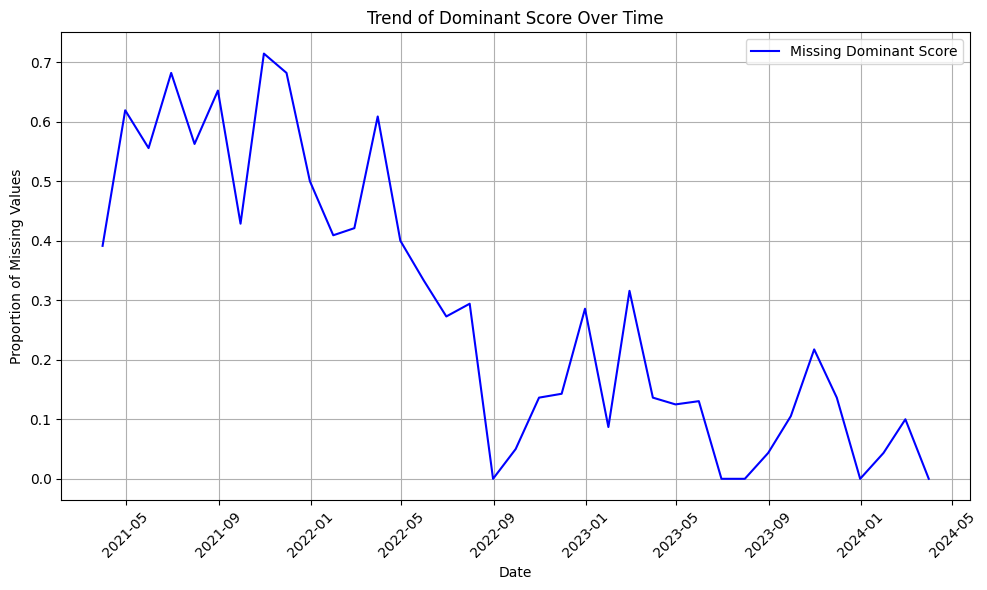

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%Y-%m-%d')


merged_data['missing_dominant_score'] = merged_data['dominant_score'].isnull().astype(int)

missing_trend = merged_data.set_index('Date').resample('M').mean()

plt.figure(figsize=(10, 6))

plt.plot(missing_trend.index, missing_trend['missing_dominant_score'], label='Missing Dominant Score', color='blue')

plt.title('Trend of Dominant Score Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Missing Values')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-25-4be720dd0b34>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  missing_trend = merged_data.set_index('Date').resample('M').mean()


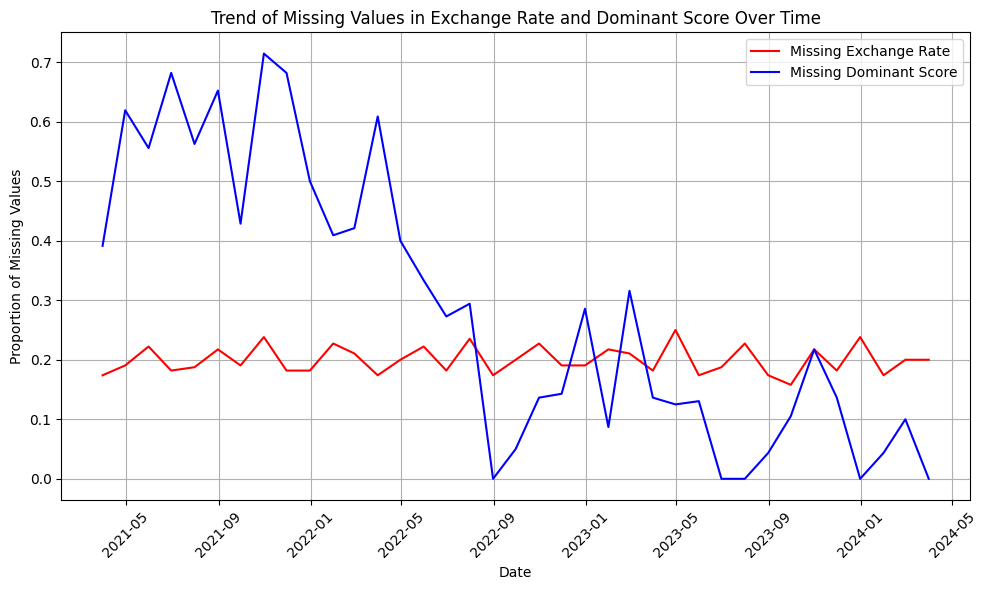

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%Y-%m-%d')

merged_data['missing_exchange_rate'] = merged_data['Exchnage_rate'].isnull().astype(int)
merged_data['missing_dominant_score'] = merged_data['dominant_score'].isnull().astype(int)

missing_trend = merged_data.set_index('Date').resample('M').mean()

plt.figure(figsize=(10, 6))

plt.plot(missing_trend.index, missing_trend['missing_exchange_rate'], label='Missing Exchange Rate', color='red')
plt.plot(missing_trend.index, missing_trend['missing_dominant_score'], label='Missing Dominant Score', color='blue')

plt.title('Trend of Missing Values in Exchange Rate and Dominant Score Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Missing Values')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


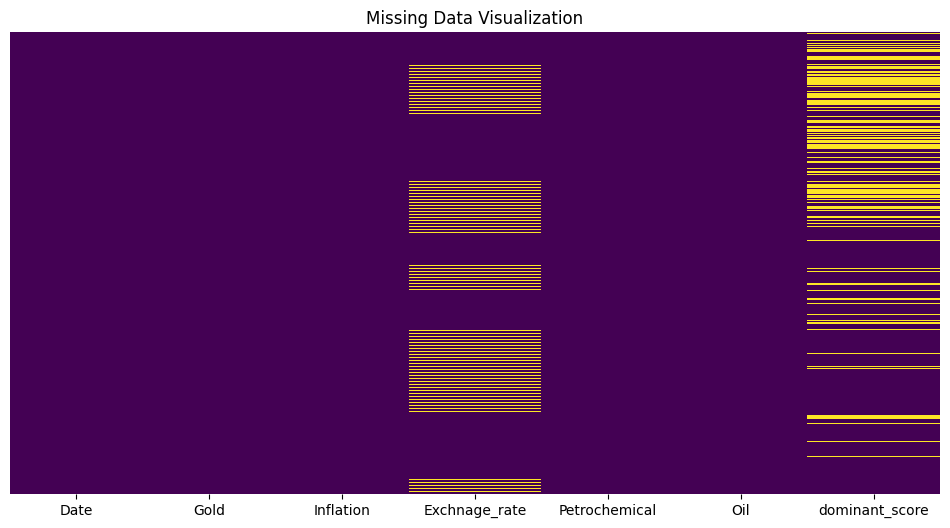

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))

sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Data Visualization')
plt.show()

In [ ]:
merged_data['dominant_score'] = merged_data['dominant_score'].ffill()
merged_data['Exchnage_rate'] = merged_data['Exchnage_rate'].ffill()
#dominant_score_mode = merged_data['dominant_score'].mode()[0]
#merged_data['dominant_score'].fillna(dominant_score_mode, inplace=True)

In [ ]:
merged_data.isnull().sum()

Date              0
Gold              0
Inflation         0
Exchnage_rate     0
Petrochemical     0
Oil               0
dominant_score    0
dtype: int64

In [ ]:
merged_data['dominant_score'] = merged_data['dominant_score'].astype(int)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            769 non-null    datetime64[ns]
 1   Gold            769 non-null    float64       
 2   Inflation       769 non-null    float64       
 3   Exchnage_rate   769 non-null    float64       
 4   Petrochemical   769 non-null    float64       
 5   Oil             769 non-null    float64       
 6   dominant_score  769 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 42.2 KB


In [ ]:
data_3 = merged_data.copy()

In [ ]:
data_3 = data_3.drop(columns=['Date'])

In [ ]:
data_3.describe()

Gold   Inflation  Exchnage_rate  Petrochemical         Oil  dominant_score
count  769.000000  769.000000     769.000000     769.000000  769.000000      769.000000
mean    37.295730    0.001635       3.748542      53.619636   31.699831        0.660598
std     10.431529    0.022197       0.003804      13.303366    2.471057        0.473814
min     17.066666   -0.099200       3.698356      36.849998   27.636362        0.000000
25%     27.200001   -0.011800       3.746172      42.000000   29.338842        0.000000
50%     40.500000    0.000000       3.746920      48.000000   31.545454        1.000000
75%     45.400002    0.013600       3.750500      68.199997   33.400002        1.000000
max     66.300003    0.099800       3.761428      85.300003   38.636364        1.000000

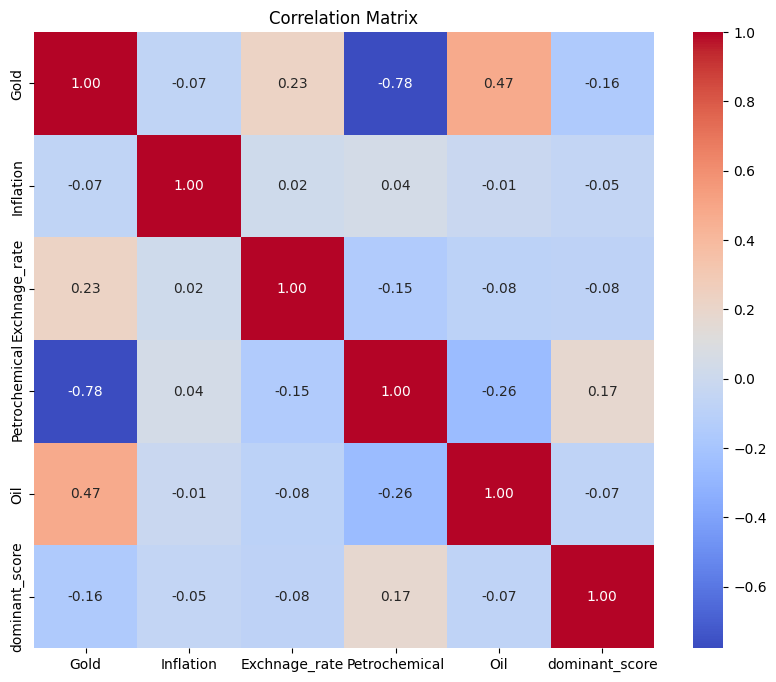

Gold  Inflation  Exchnage_rate  Petrochemical       Oil  dominant_score
Gold            1.000000  -0.065004       0.227424      -0.777362  0.473156       -0.156777
Inflation      -0.065004   1.000000       0.017169       0.043747 -0.013736       -0.052820
Exchnage_rate   0.227424   0.017169       1.000000      -0.148752 -0.084519       -0.076318
Petrochemical  -0.777362   0.043747      -0.148752       1.000000 -0.262364        0.174640
Oil             0.473156  -0.013736      -0.084519      -0.262364  1.000000       -0.071333
dominant_score -0.156777  -0.052820      -0.076318       0.174640 -0.071333        1.000000

In [ ]:
correlation_matrix = data_3.corr()

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [ ]:
df= merged_data.copy()

In [ ]:
df.shape

(769, 7)

In [ ]:
df.columns

Index(['Date', 'Gold', 'Inflation', 'Exchnage_rate', 'Petrochemical', 'Oil', 'dominant_score'], dtype='object')

In [ ]:

max_lags = 10


variables = ['Inflation', 'Exchnage_rate', 'Petrochemical', 'Oil','dominant_score']


correlation_results = pd.DataFrame(index=[f"Lag_{i}" for i in range(1, max_lags + 1)])


for var in variables:
    for lag in range(1, max_lags + 1):

        df[f'{var}_lag{lag}'] = df[var].shift(lag)

        correlation = df['Gold'].corr(df[f'{var}_lag{lag}'])
        correlation_results.loc[f"Lag_{lag}", var] = correlation


for lag in range(1, max_lags + 1):
    df[f'Gold_lag{lag}'] = df['Gold'].shift(lag)
    correlation = df['Gold'].corr(df[f'Gold_lag{lag}'])
    correlation_results.loc[f"Lag_{lag}", 'Gold'] = correlation

correlation_results

Inflation  Exchnage_rate  Petrochemical       Oil  dominant_score      Gold
Lag_1    0.013661       0.231247      -0.775434  0.474027       -0.156548  0.989801
Lag_2    0.014599       0.240142      -0.774726  0.473214       -0.165805  0.984789
Lag_3    0.007656       0.249487      -0.774246  0.471430       -0.170931  0.980641
Lag_4    0.019423       0.253096      -0.773696  0.469805       -0.165865  0.976064
Lag_5    0.018257       0.260188      -0.773069  0.467933       -0.174020  0.971541
Lag_6    0.015842       0.260297      -0.772373  0.466422       -0.164757  0.966933
Lag_7    0.017541       0.264799      -0.771549  0.465735       -0.166955  0.962635
Lag_8    0.021642       0.272740      -0.770761  0.465605       -0.168402  0.957880
Lag_9    0.019557       0.271642      -0.770000  0.465299       -0.159885  0.953338
Lag_10   0.021831       0.278313      -0.769264  0.465212       -0.162700  0.948532

In [ ]:
best_lags = {}
for var in correlation_results.columns:
    best_lag = correlation_results[var].idxmax()
    lag_number = int(best_lag.split('_')[1])
    best_lags[var] = lag_number
    df[f'{var}_best_lag'] = df[var].shift(lag_number)

df[['Date', 'Gold'] + [f'{var}_best_lag' for var in best_lags.keys()]].head(), best_lags

(        Date       Gold  Inflation_best_lag  Exchnage_rate_best_lag  Petrochemical_best_lag  Oil_best_lag  dominant_score_best_lag  Gold_best_lag
 0 2021-03-01  17.433332                 NaN                     NaN                     NaN           NaN                      NaN            NaN
 1 2021-03-02  17.500000                 NaN                     NaN                     NaN     28.429752                      0.0      17.433332
 2 2021-03-03  17.299999                 NaN                     NaN                     NaN     28.471073                      1.0      17.500000
 3 2021-03-04  17.233334                 NaN                     NaN                     NaN     28.471073                      1.0      17.299999
 4 2021-03-07  17.066666                 NaN                     NaN                     NaN     28.925619                      1.0      17.233334,
 {'Inflation': 10,
  'Exchnage_rate': 10,
  'Petrochemical': 10,
  'Oil': 1,
  'dominant_score': 1,
  'Gold': 1})

In [ ]:
merged_data.to_csv('model_data-2021-2024.csv', index=False)

#***********************************************************

************************************************************

************************************************************

# CNN-LSTM MODEL

## importing packages

In [ ]:
!pip install tensorflow==2.13

In [ ]:
!pip install keras==3.3

  Using cached keras-3.3.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.3.0-py3-none-any.whl (1.5 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 3.3.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.13.0 which is incompatible.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
import keras
print(keras.__version__)

3.3.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
from keras.layers import Activation
import tensorflow as tf

from keras.models import Model, Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, concatenate, Dropout, TimeDistributed, Reshape
from keras.optimizers import Adam

## CNN-LSTM model without score tweets

In [ ]:
data = pd.read_csv('/content/model_data-2021-2024.csv')
data.tail()

Date       Gold  Inflation  Exchnage_rate  Petrochemical  \
764  2024-03-24  52.900002    -0.0038       3.745792      37.799999   
765  2024-03-25  51.900002    -0.0269       3.746232      37.599998   
766  2024-03-26  50.400002    -0.0119       3.746055      37.500000   
767  2024-03-27  50.000000     0.0300       3.745938      36.900002   
768  2024-03-28  51.599998    -0.0194       3.746052      37.000000   

           Oil  dominant_score  
764  31.250000               1  
765  31.200001               0  
766  30.900000               0  
767  30.900000               0  
768  30.950001               0

In [ ]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

data = data.drop(['dominant_score'], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Date'], axis=1))

X = scaled_data
y = scaled_data[:, 0]

timesteps = 10
features = X.shape[1]

dates = data.pop('Date')

X_reshaped = []
y_reshaped = []
date_reshaped = []

for i in range(len(X) - timesteps):
    X_reshaped.append(X[i:i + timesteps])
    y_reshaped.append(y[i + timesteps])
    date_reshaped.append(dates.iloc[i + timesteps])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)


train_split = int(len(X_reshaped) * 0.7)
val_split = int(len(X_reshaped) * 0.8)

X_train, X_val, X_test = X_reshaped[:train_split], X_reshaped[train_split:val_split], X_reshaped[val_split:]
y_train, y_val, y_test = y_reshaped[:train_split], y_reshaped[train_split:val_split], y_reshaped[val_split:]
dates_train, dates_val, dates_test = date_reshaped[:train_split], date_reshaped[train_split:val_split], date_reshaped[val_split:]

In [ ]:
cnn_lstm_with = Sequential()
cnn_lstm_with.add (TimeDistributed(Conv1D(filters=50, kernel_size=3, activation='tanh', padding='same'), input_shape=(timesteps, features, 1)))
cnn_lstm_with.add(TimeDistributed(MaxPooling1D(pool_size=2)))
cnn_lstm_with.add(TimeDistributed(Flatten()))
cnn_lstm_with.add(LSTM(units=100, activation='tanh'))
cnn_lstm_with.add(Dropout(0.3))
cnn_lstm_with.add(Dense(units=100, activation='relu'))
cnn_lstm_with.add(Dense(units=1))
optimizer = Adam(learning_rate=0.01)
cnn_lstm_with.compile(optimizer=optimizer, loss='mean_squared_error')
cnn_lstm_with.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 10, 5, 50)           │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 10, 2, 50)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,801 (354.69 KB)

 Trainable params: 90,801 (354.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3033 - val_loss: 0.0040
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0072 - val_loss: 0.0035
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0028 - val_loss: 0.0068
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 8.8

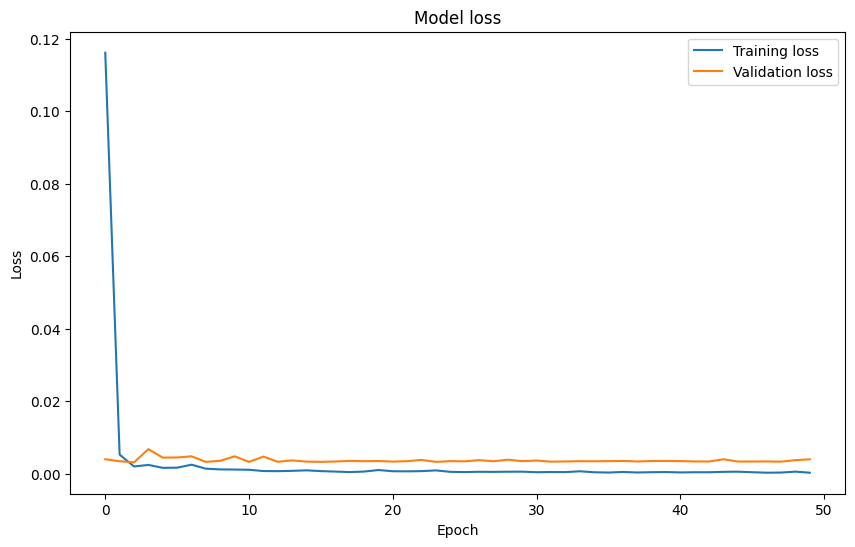

In [ ]:
history = cnn_lstm_with.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
cnn_lstm_with.save('model_cnnn_lstm_with.h5')

In [ ]:
#from tensorflow.keras.models import load_model

# Load the saved model
#cnn_lstm_with = load_model('/content/model_cnnn_lstm_with.h5')

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step
        Actual  Predicted
0    40.450001  39.616708
1    40.000000  39.266780
2    40.299999  39.277541
3    40.799999  39.890888
4    40.500000  39.409243
..         ...        ...
147  52.900002  50.761165
148  51.900002  50.776685
149  50.400002  49.349333
150  50.000000  48.738918
151  51.599998  49.992352

[152 rows x 2 columns]


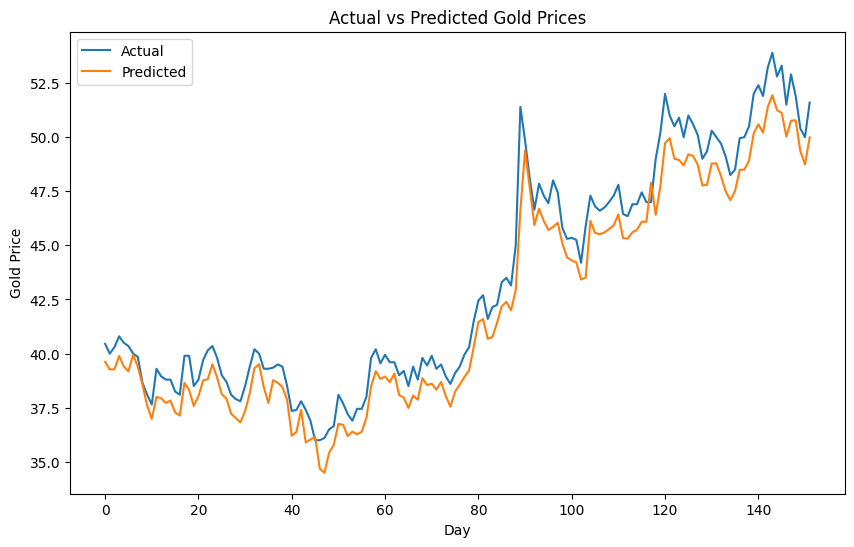

In [ ]:
y_pred = cnn_lstm_with.predict(X_test)

y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

results_df = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})

print(results_df)

plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual')
plt.plot(results_df['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Day')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

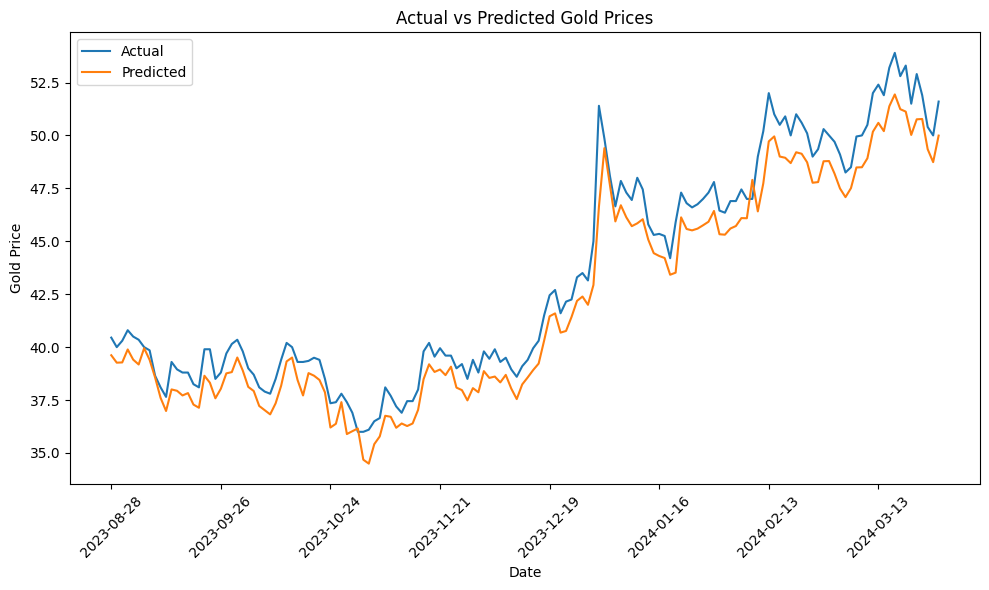

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dates_test, results_df['Actual'], label='Actual')
plt.plot(dates_test, results_df['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()


plt.xticks(ticks=range(0, len(dates_test), 20), labels=dates_test[::20], rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
data_con = results_df.copy()

In [ ]:
data_con = data_con.rename(columns={'Actual': 'actual', 'Predicted': 'predicted'})


data_con['actual_change'] = data_con['actual'].diff().apply(lambda x: 'rise' if x > 0 else 'fall')
data_con['predicted_change'] = data_con['predicted'].diff().apply(lambda x: 'rise' if x > 0 else 'fall')


data_con = data_con.dropna()


true_positive = ((data_con['actual_change'] == 'rise') & (data_con['predicted_change'] == 'rise')).sum()
true_negative = ((data_con['actual_change'] == 'fall') & (data_con['predicted_change'] == 'fall')).sum()
false_positive = ((data_con['actual_change'] == 'fall') & (data_con['predicted_change'] == 'rise')).sum()
false_negative = ((data_con['actual_change'] == 'rise') & (data_con['predicted_change'] == 'fall')).sum()


confusion_matrix = pd.DataFrame({
    'Predicted Fall': [true_negative, false_negative],
    'Predicted Rise': [false_positive, true_positive]
}, index=['Actual Fall', 'Actual Rise'])

confusion_matrix

Predicted Fall  Predicted Rise
Actual Fall              66              15
Actual Rise               8              63

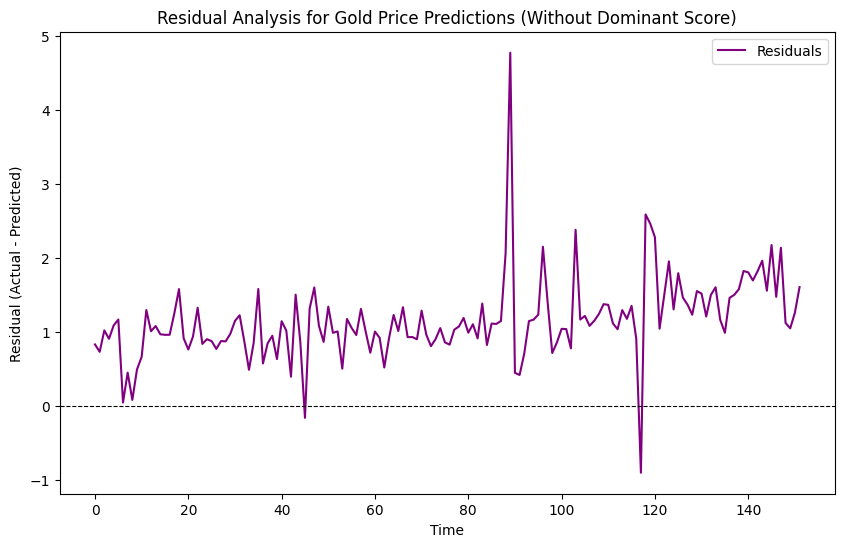

In [ ]:
results_df['Residual'] = results_df['Actual'] - results_df['Predicted']


plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Residual'], label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Time')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Analysis for Gold Price Predictions (Without Dominant Score)')
plt.legend()
plt.show()


In [ ]:
mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
mae = mean_absolute_error(results_df['Actual'], results_df['Predicted'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((results_df['Actual'] - results_df['Predicted']) / results_df['Actual'])) * 100
r2 = r2_score(results_df['Actual'], results_df['Predicted'])


print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R2: {r2}%")

MSE: 1.6395176326107805
MAE: 1.168562326322277
RMSE: 1.2804365008116492
MAPE: 2.6589912968642335%
R2: 0.939473676902679%


           Date     MSE     MAE    RMSE   MAPE
0    2023-08-28  0.6944  0.8333  0.8333  2.06%
1    2023-08-29  0.5376  0.7332  0.7332  1.83%
2    2023-08-30  1.0454  1.0225  1.0225  2.54%
3    2023-08-31  0.8265  0.9091  0.9091  2.23%
4    2023-09-03  1.1898  1.0908  1.0908  2.69%
..          ...     ...     ...     ...    ...
148  2024-03-25  1.2618  1.1233  1.1233  2.16%
149  2024-03-26  1.1039  1.0507  1.0507  2.08%
150  2024-03-27  1.5903  1.2611  1.2611  2.52%
151  2024-03-28  2.5845  1.6076  1.6076  3.12%
152     Average  1.6395  1.1686  1.1686  2.66%

[153 rows x 5 columns]


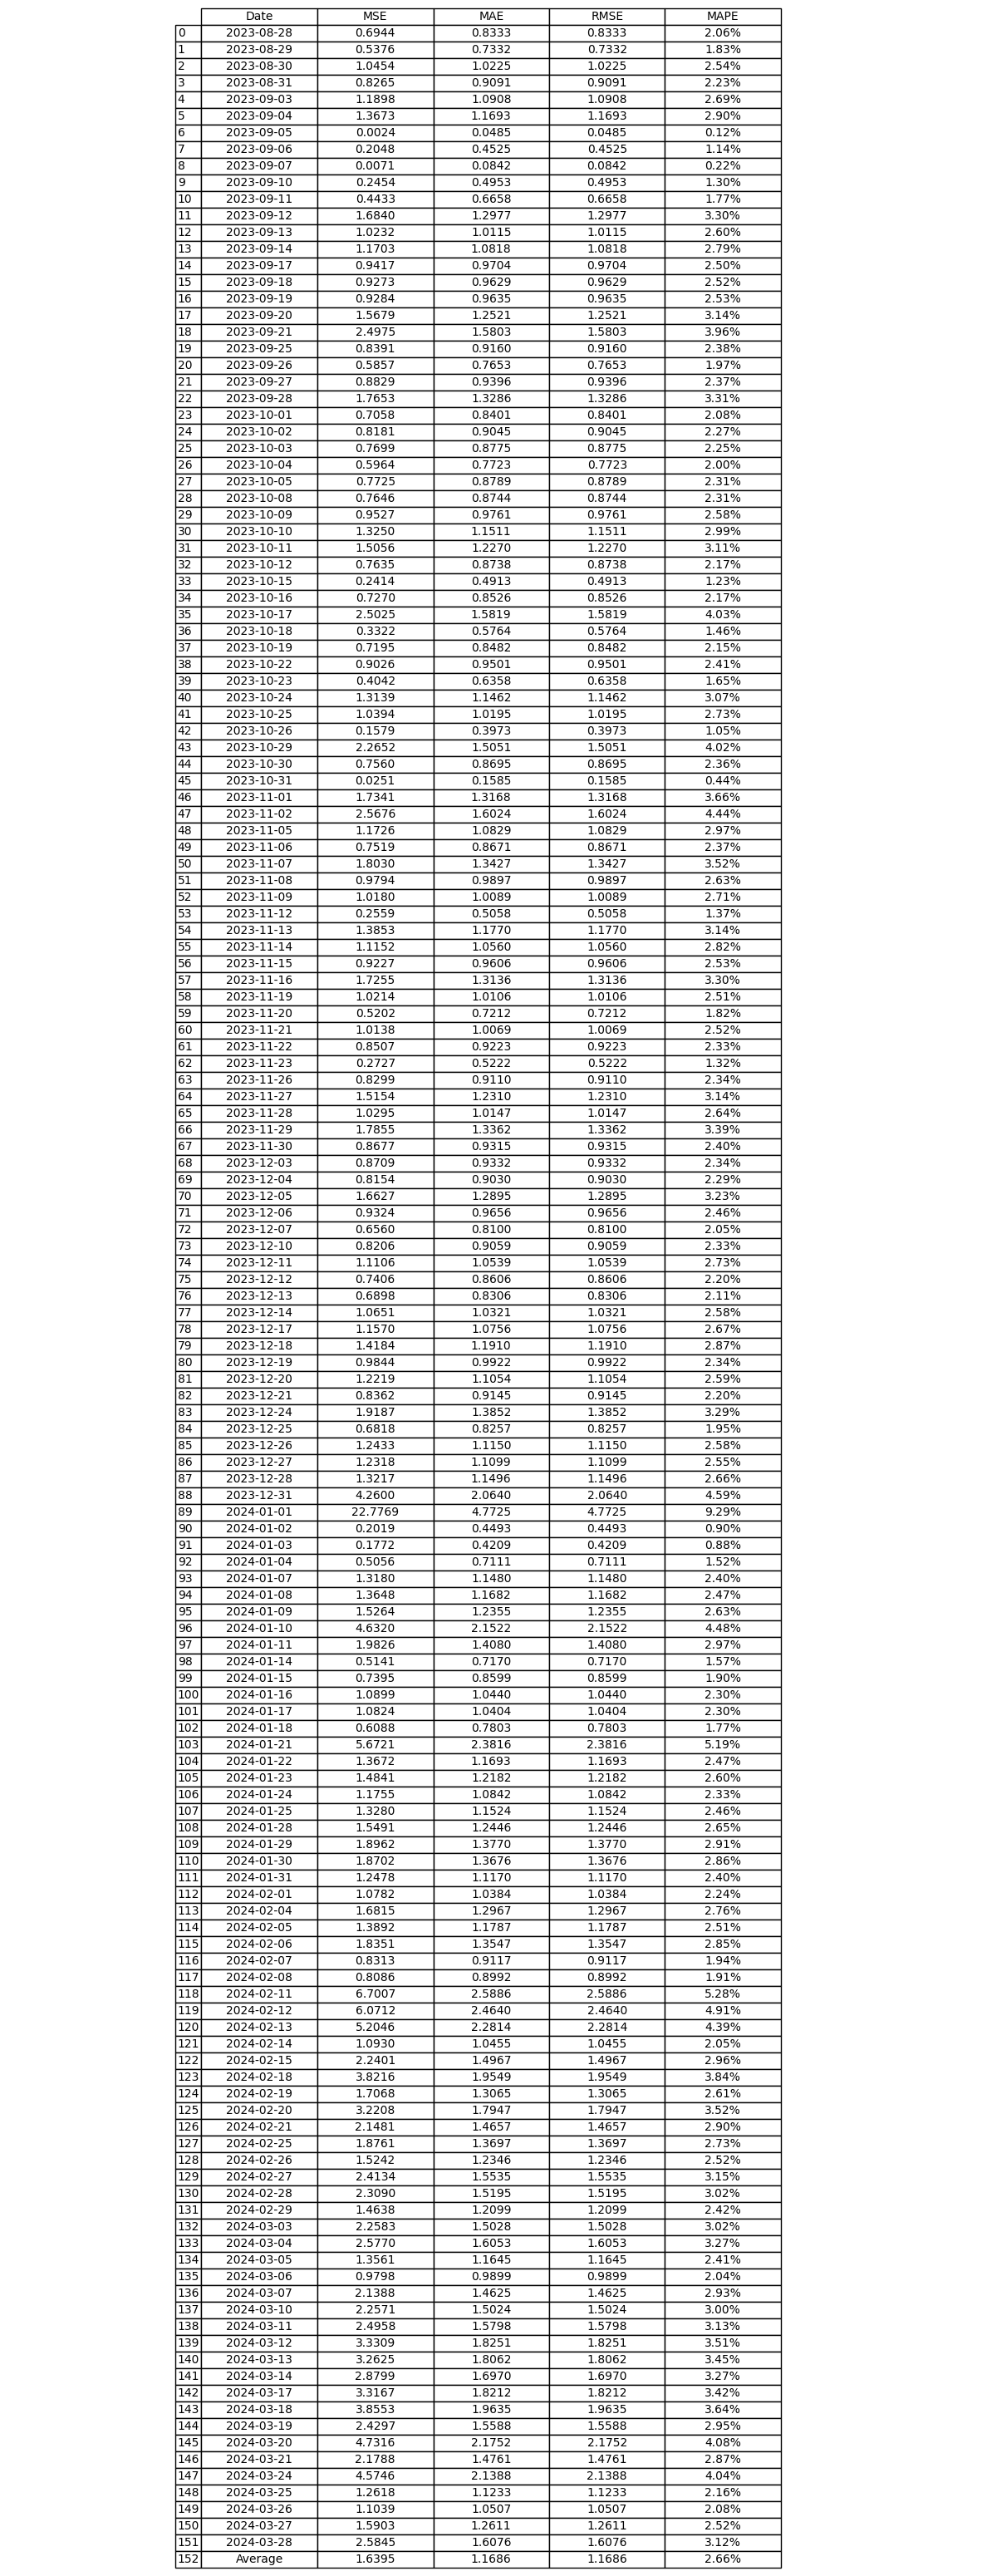

In [ ]:
results_dff = pd.DataFrame({'Date': dates_test, 'Actual': y_test_actual, 'Predicted': y_pred_actual})


metrics_list = []

for i in range(len(results_dff)):
    date = results_dff['Date'].iloc[i]
    actual = results_dff['Actual'].iloc[i]
    predicted = results_dff['Predicted'].iloc[i]

    mae = mean_absolute_error([actual], [predicted])
    mse = mean_squared_error([actual], [predicted])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    metrics_list.append({'Date': date, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics_list)


avg_metrics = metrics_df.mean(numeric_only=True).to_dict()
avg_metrics['Date'] = 'Average'
metrics_df = pd.concat([metrics_df, pd.DataFrame([avg_metrics])], ignore_index=True)


metrics_df['MSE'] = metrics_df['MSE'].apply(lambda x: f"{x:.4f}")
metrics_df['MAE'] = metrics_df['MAE'].apply(lambda x: f"{x:.4f}")
metrics_df['RMSE'] = metrics_df['RMSE'].apply(lambda x: f"{x:.4f}")
metrics_df['MAPE'] = metrics_df['MAPE'].apply(lambda x: f"{x:.2f}%")


print(metrics_df)


fig, ax = plt.subplots(figsize=(15, 6))


ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)


table = pd.plotting.table(ax, metrics_df, loc='center', cellLoc='center', colWidths=[0.1] * len(metrics_df.columns))


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


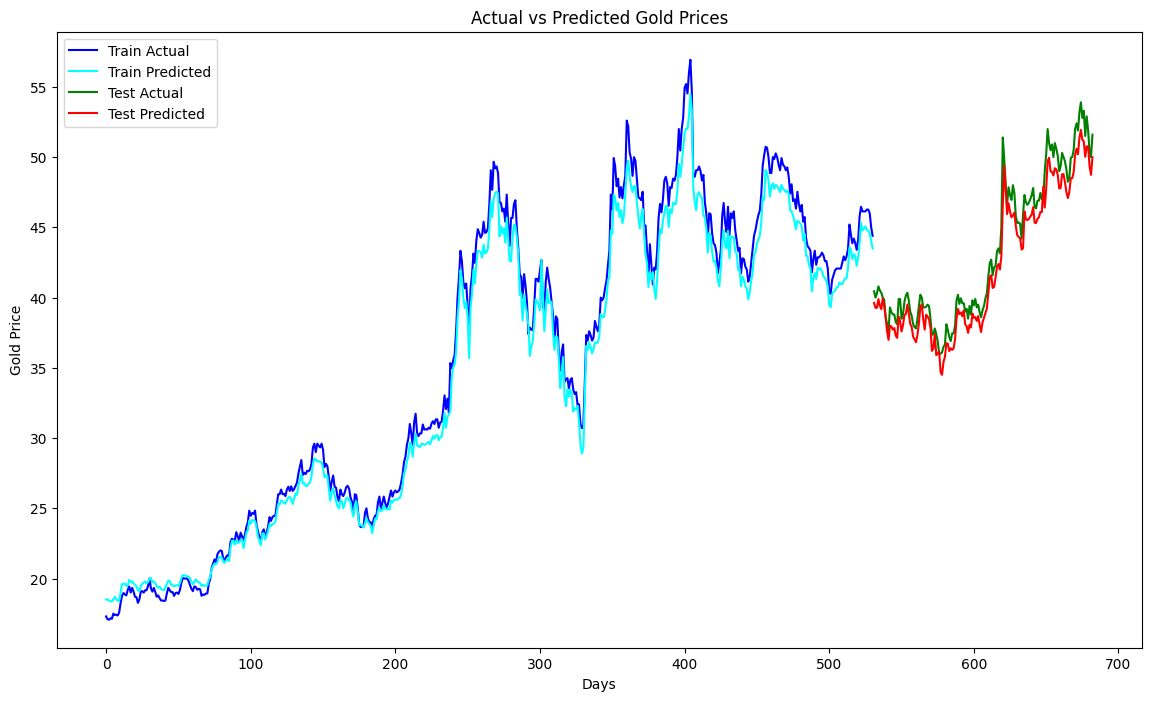

In [ ]:
y_train_pred = cnn_lstm_with.predict(X_train)
y_test_pred = cnn_lstm_with.predict(X_test)


y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_train_pred_actual = scaler.inverse_transform(np.concatenate((y_train_pred, np.zeros((y_train_pred.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_test_pred_actual = scaler.inverse_transform(np.concatenate((y_test_pred, np.zeros((y_test_pred.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]


results_train_df = pd.DataFrame({'Actual': y_train_actual, 'Predicted': y_train_pred_actual})
results_test_df = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_test_pred_actual})


plt.figure(figsize=(14, 8))


plt.plot(results_train_df.index, results_train_df['Actual'], label='Train Actual', color='blue')
plt.plot(results_train_df.index, results_train_df['Predicted'], label='Train Predicted', color='cyan')


plt.plot(results_test_df.index + len(results_train_df), results_test_df['Actual'], label='Test Actual', color='green')
plt.plot(results_test_df.index + len(results_train_df), results_test_df['Predicted'], label='Test Predicted', color='red')

plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Days')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

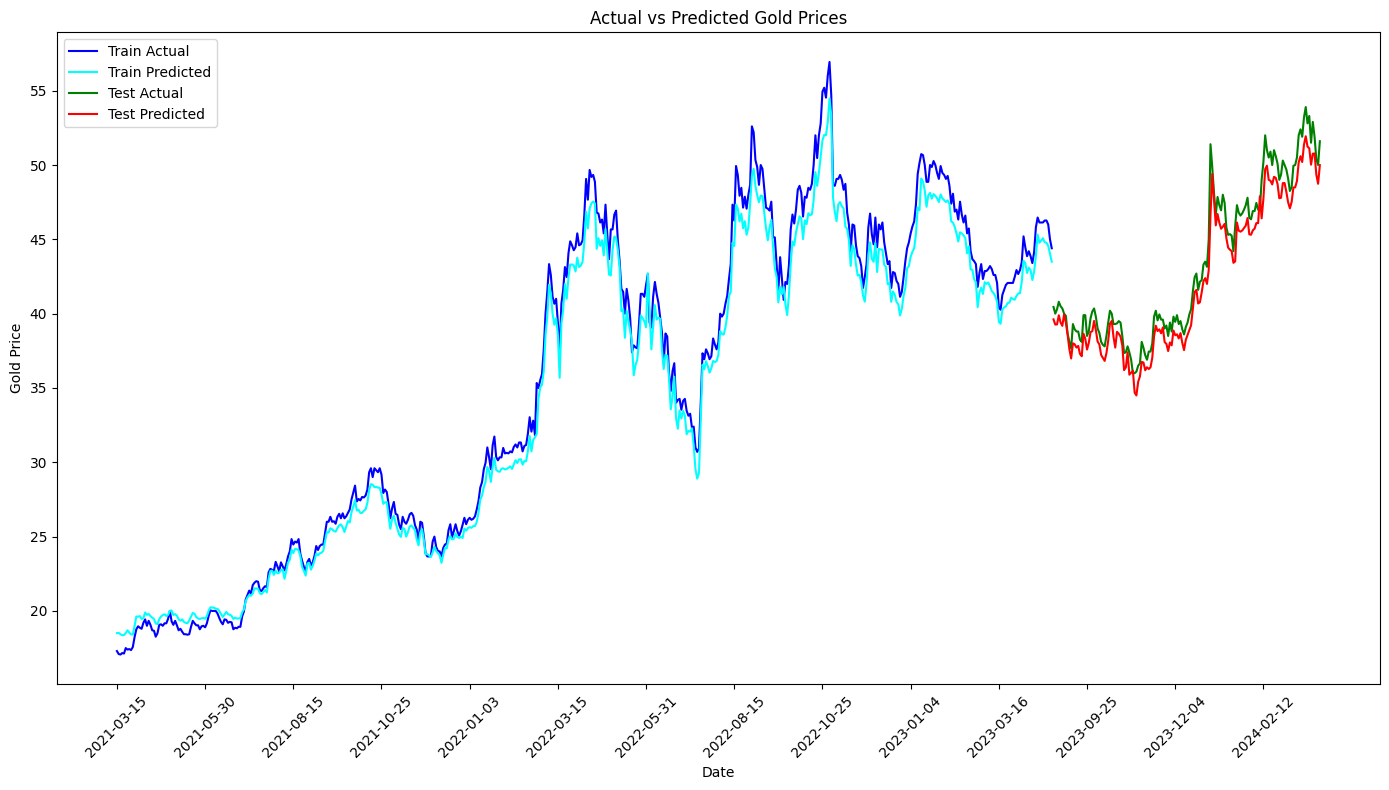

In [ ]:
plt.figure(figsize=(14, 8))


plt.plot(dates_train, results_train_df['Actual'], label='Train Actual', color='blue')
plt.plot(dates_train, results_train_df['Predicted'], label='Train Predicted', color='cyan')


plt.plot(dates_test, results_test_df['Actual'], label='Test Actual', color='green')
plt.plot(dates_test, results_test_df['Predicted'], label='Test Predicted', color='red')

plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()

dates_combined = list(dates_train) + list(dates_test)


plt.xticks(ticks=range(0, len(dates_combined), 50), labels=dates_combined[::50], rotation=45)

plt.tight_layout()
plt.show()




## CNN-LSTM model with score tweets

In [ ]:
data_2 = pd.read_csv('/content/model_data-2021-2024.csv')
data_2.tail()

Date       Gold  Inflation  Exchnage_rate  Petrochemical  \
764  2024-03-24  52.900002    -0.0038       3.745792      37.799999   
765  2024-03-25  51.900002    -0.0269       3.746232      37.599998   
766  2024-03-26  50.400002    -0.0119       3.746055      37.500000   
767  2024-03-27  50.000000     0.0300       3.745938      36.900002   
768  2024-03-28  51.599998    -0.0194       3.746052      37.000000   

           Oil  dominant_score  
764  31.250000               1  
765  31.200001               0  
766  30.900000               0  
767  30.900000               0  
768  30.950001               0

In [ ]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_2.drop(columns=['Date'], axis=1))

X = scaled_data
y = scaled_data[:, 0]

timesteps = 10
features = X.shape[1]

dates = data_2.pop('Date')

X_reshaped = []
y_reshaped = []
date_reshaped = []

for i in range(len(X) - timesteps):
    X_reshaped.append(X[i:i + timesteps])
    y_reshaped.append(y[i + timesteps])
    date_reshaped.append(dates.iloc[i + timesteps])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

train_split = int(len(X_reshaped) * 0.7)
val_split = int(len(X_reshaped) * 0.8)

X_train, X_val, X_test = X_reshaped[:train_split], X_reshaped[train_split:val_split], X_reshaped[val_split:]
y_train, y_val, y_test = y_reshaped[:train_split], y_reshaped[train_split:val_split], y_reshaped[val_split:]
dates_train, dates_val, dates_test = date_reshaped[:train_split], date_reshaped[train_split:val_split], date_reshaped[val_split:]


In [ ]:
model_cnn_lstm_without = Sequential()
model_cnn_lstm_without.add (TimeDistributed(Conv1D(filters=50, kernel_size=3, activation='tanh', padding='same'), input_shape=(timesteps, features, 1)))
model_cnn_lstm_without.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm_without.add(TimeDistributed(Flatten()))
model_cnn_lstm_without.add(LSTM(units=100, activation='tanh'))
model_cnn_lstm_without.add(Dropout(0.3))
model_cnn_lstm_without.add(Dense(units=100, activation='relu'))
model_cnn_lstm_without.add(Dense(units=1))
optimizer = Adam(learning_rate=0.01)
model_cnn_lstm_without.compile(optimizer=optimizer, loss='mean_squared_error')
model_cnn_lstm_without.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_3 (TimeDistributed) │ (None, 10, 6, 50)           │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 10, 3, 50)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 10, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,801 (432.82 KB)

 Trainable params: 110,801 (432.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4844 - val_loss: 0.0043
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - val_loss: 0.0065
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033 - val_loss: 0.0047
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0018 - val_loss: 0.0060
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 8.4

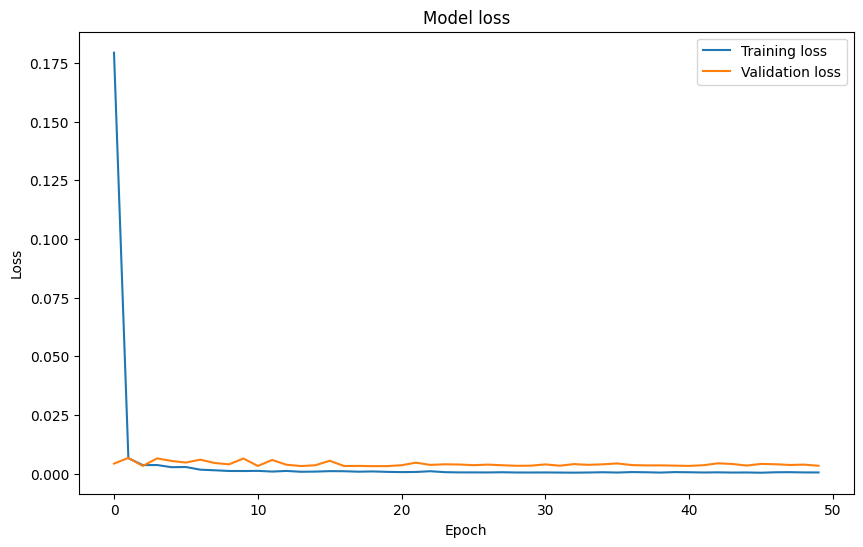

In [ ]:
history = model_cnn_lstm_without.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model_cnn_lstm_without.save('model_cnnn_lstm_without.h5')

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step
        Actual  Predicted
0    40.450001  40.769527
1    40.000000  40.476499
2    40.299999  40.469753
3    40.799999  41.059228
4    40.500000  40.833269
..         ...        ...
147  52.900002  50.875799
148  51.900002  51.129021
149  50.400002  49.286408
150  50.000000  48.867764
151  51.599998  50.454820

[152 rows x 2 columns]


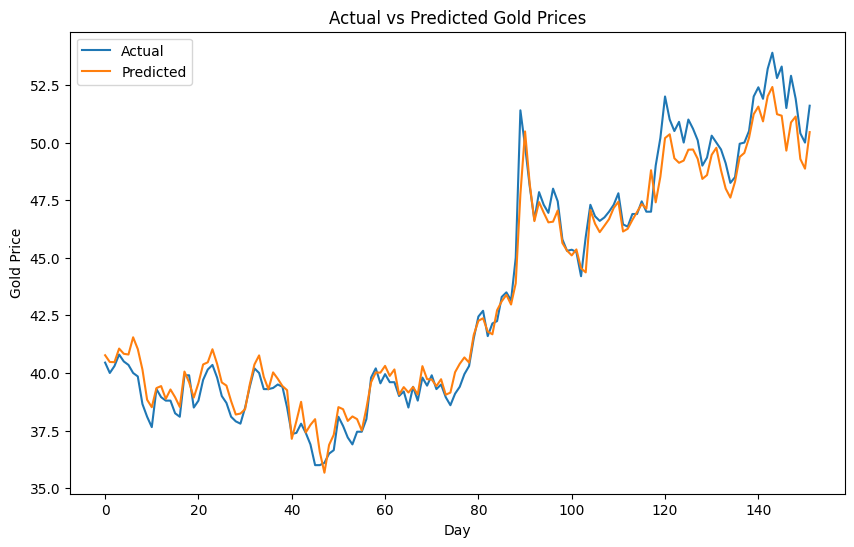

In [ ]:
y_pred = model_cnn_lstm_without.predict(X_test)


y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]


results_df = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})

print(results_df)


plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual')
plt.plot(results_df['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Day')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

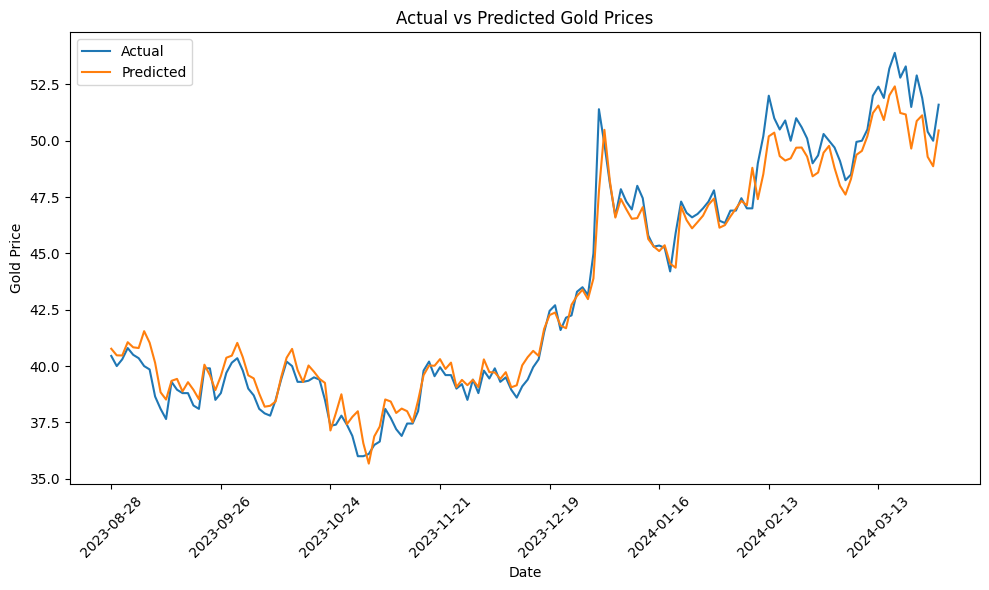

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dates_test, results_df['Actual'], label='Actual')
plt.plot(dates_test, results_df['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()


plt.xticks(ticks=range(0, len(dates_test), 20), labels=dates_test[::20], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
data_con = results_df.copy()

In [ ]:
data_con = data_con.rename(columns={'Actual': 'actual', 'Predicted': 'predicted'})


data_con['actual_change'] = data_con['actual'].diff().apply(lambda x: 'rise' if x > 0 else 'fall')
data_con['predicted_change'] = data_con['predicted'].diff().apply(lambda x: 'rise' if x > 0 else 'fall')


data_con = data_con.dropna()


true_positive = ((data_con['actual_change'] == 'rise') & (data_con['predicted_change'] == 'rise')).sum()
true_negative = ((data_con['actual_change'] == 'fall') & (data_con['predicted_change'] == 'fall')).sum()
false_positive = ((data_con['actual_change'] == 'fall') & (data_con['predicted_change'] == 'rise')).sum()
false_negative = ((data_con['actual_change'] == 'rise') & (data_con['predicted_change'] == 'fall')).sum()


confusion_matrix = pd.DataFrame({
    'Predicted Fall': [true_negative, false_negative],
    'Predicted Rise': [false_positive, true_positive]
}, index=['Actual Fall', 'Actual Rise'])

confusion_matrix

Predicted Fall  Predicted Rise
Actual Fall              60              21
Actual Rise              12              59

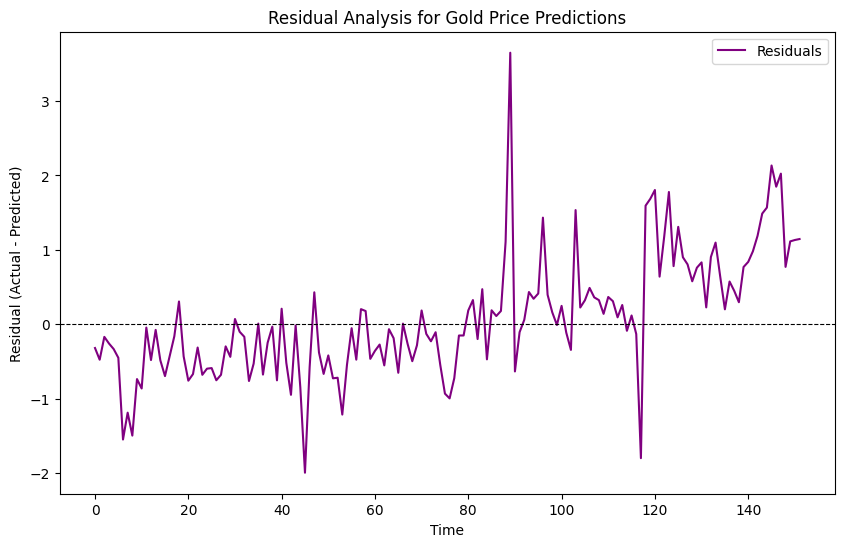

In [ ]:
results_df['Residual'] = results_df['Actual'] - results_df['Predicted']


plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Residual'], label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Time')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Analysis for Gold Price Predictions')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
mae = mean_absolute_error(results_df['Actual'], results_df['Predicted'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((results_df['Actual'] - results_df['Predicted']) / results_df['Actual'])) * 100
r2 = r2_score(results_df['Actual'], results_df['Predicted'])


print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R2: {r2}%")

MSE: 0.6708621809148407
MAE: 0.6127020253149817
RMSE: 0.8190617686809956
MAPE: 1.3814579543709695%
R2: 0.9752336783038035%


           Date     MSE     MAE    RMSE   MAPE
0    2023-08-28  0.1021  0.3195  0.3195  0.79%
1    2023-08-29  0.2271  0.4765  0.4765  1.19%
2    2023-08-30  0.0288  0.1698  0.1698  0.42%
3    2023-08-31  0.0672  0.2592  0.2592  0.64%
4    2023-09-03  0.1111  0.3333  0.3333  0.82%
..          ...     ...     ...     ...    ...
148  2024-03-25  0.5944  0.7710  0.7710  1.49%
149  2024-03-26  1.2401  1.1136  1.1136  2.21%
150  2024-03-27  1.2820  1.1322  1.1322  2.26%
151  2024-03-28  1.3114  1.1452  1.1452  2.22%
152     Average  0.6709  0.6127  0.6127  1.38%

[153 rows x 5 columns]


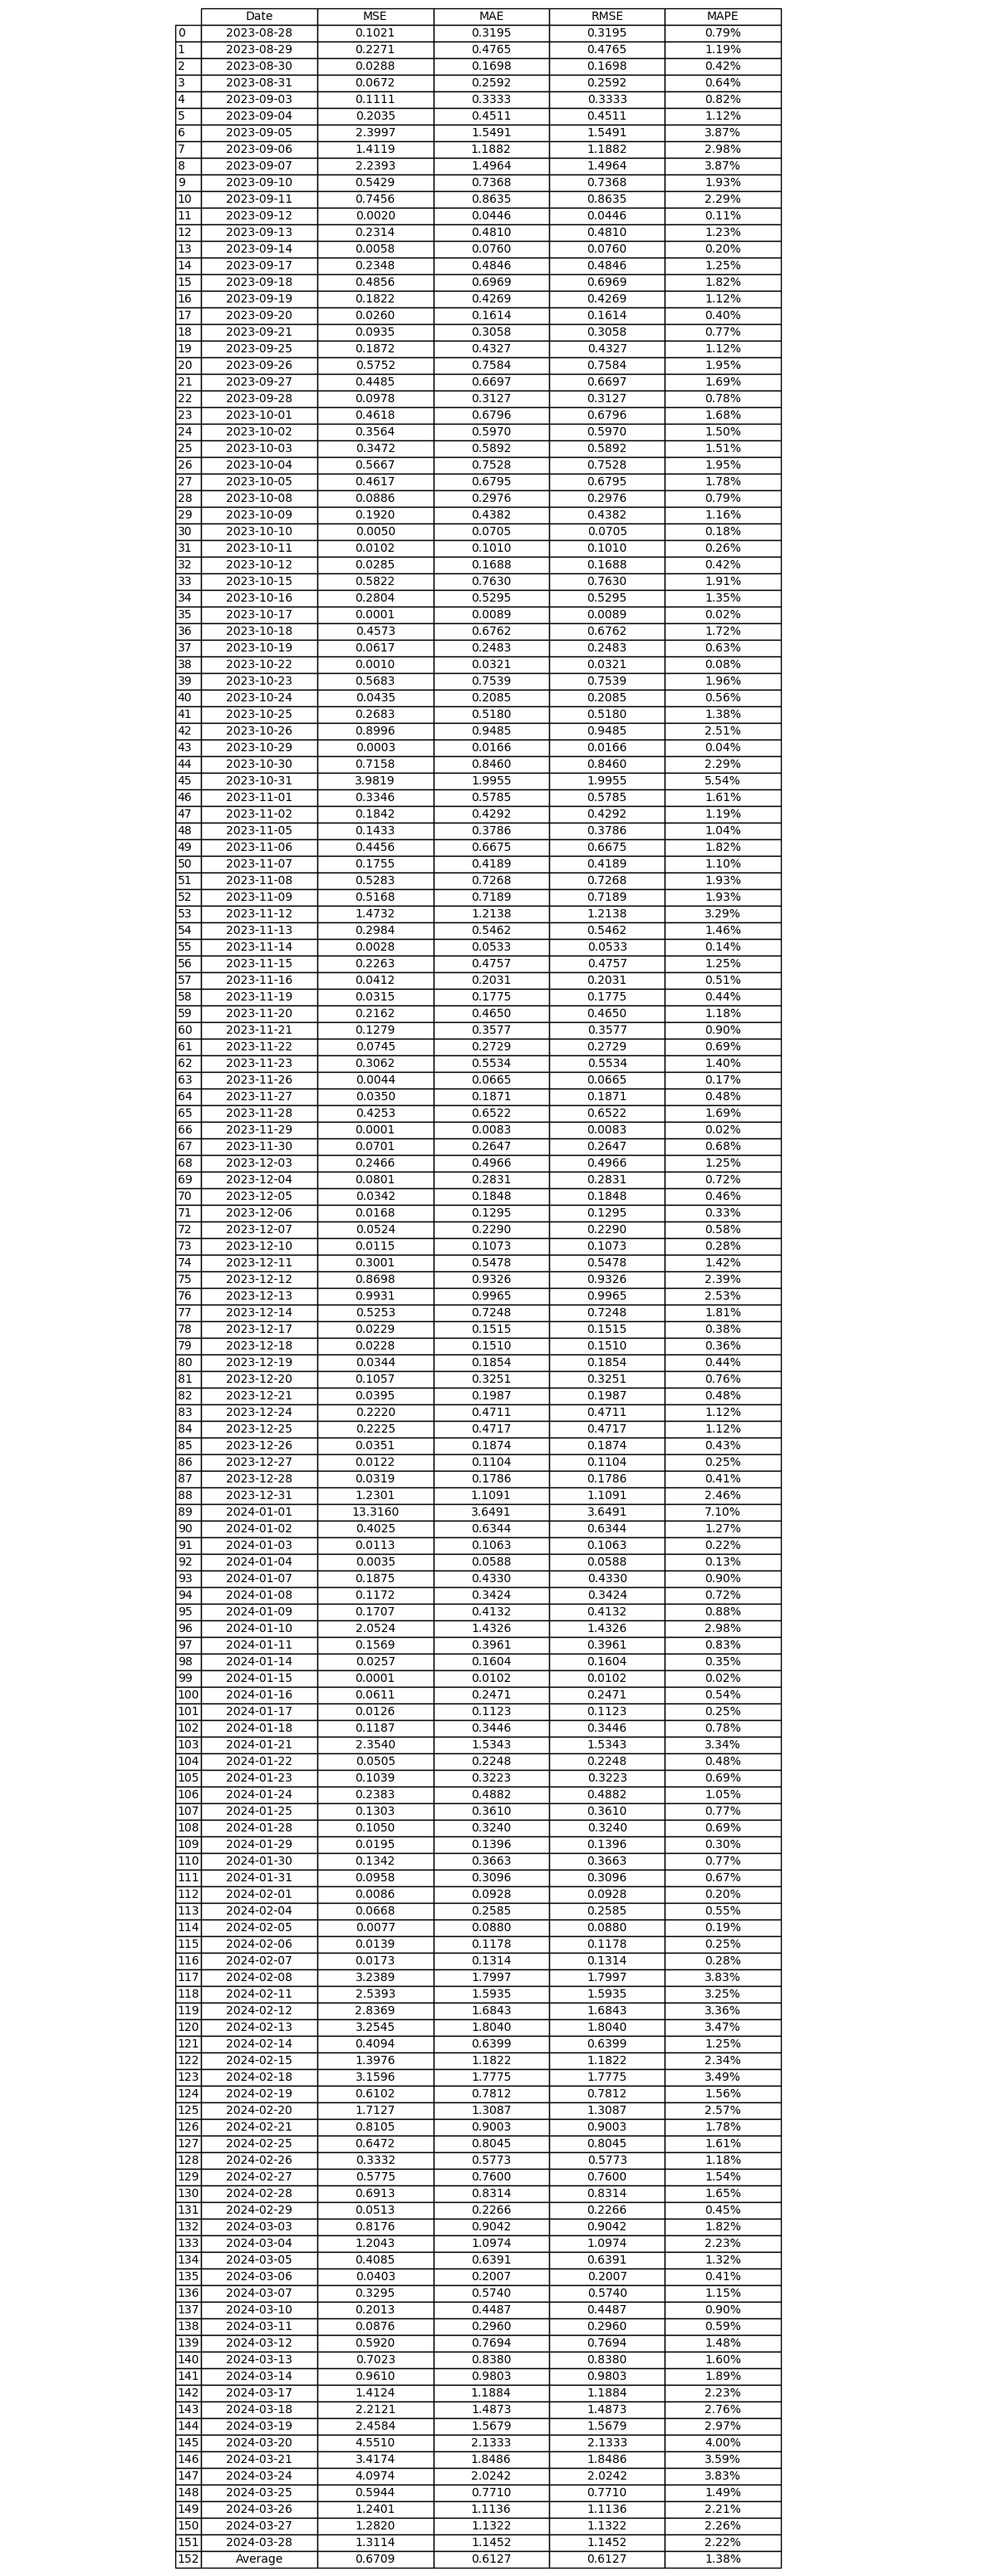

In [ ]:
results_dff = pd.DataFrame({'Date': dates_test, 'Actual': y_test_actual, 'Predicted': y_pred_actual})


metrics_list = []

for i in range(len(results_dff)):
    date = results_dff['Date'].iloc[i]
    actual = results_dff['Actual'].iloc[i]
    predicted = results_dff['Predicted'].iloc[i]

    mae = mean_absolute_error([actual], [predicted])
    mse = mean_squared_error([actual], [predicted])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    metrics_list.append({'Date': date, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape})

metrics_df = pd.DataFrame(metrics_list)

avg_metrics = metrics_df.mean(numeric_only=True).to_dict()
avg_metrics['Date'] = 'Average'
metrics_df = pd.concat([metrics_df, pd.DataFrame([avg_metrics])], ignore_index=True)

metrics_df['MSE'] = metrics_df['MSE'].apply(lambda x: f"{x:.4f}")
metrics_df['MAE'] = metrics_df['MAE'].apply(lambda x: f"{x:.4f}")
metrics_df['RMSE'] = metrics_df['RMSE'].apply(lambda x: f"{x:.4f}")
metrics_df['MAPE'] = metrics_df['MAPE'].apply(lambda x: f"{x:.2f}%")

print(metrics_df)

fig, ax = plt.subplots(figsize=(15, 6))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = pd.plotting.table(ax, metrics_df, loc='center', cellLoc='center', colWidths=[0.1] * len(metrics_df.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


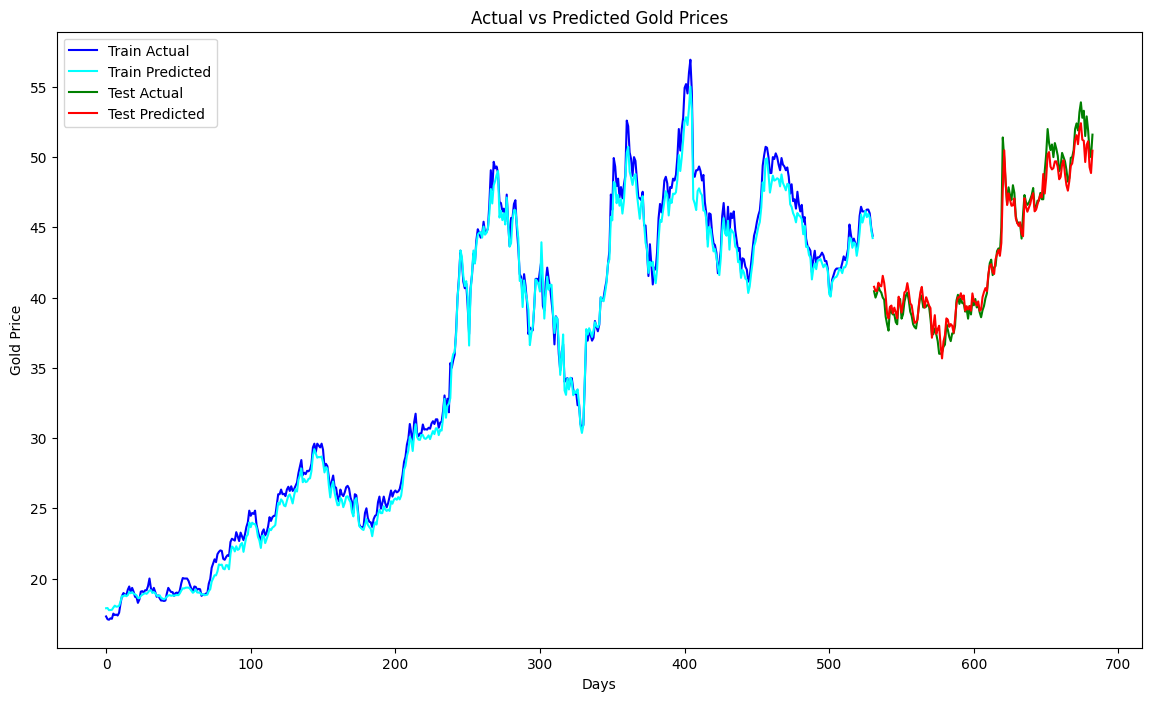

In [ ]:
y_train_pred = model_cnn_lstm_without.predict(X_train)
y_test_pred = model_cnn_lstm_without.predict(X_test)


y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_train_pred_actual = scaler.inverse_transform(np.concatenate((y_train_pred, np.zeros((y_train_pred.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_test_pred_actual = scaler.inverse_transform(np.concatenate((y_test_pred, np.zeros((y_test_pred.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]


results_train_df = pd.DataFrame({'Actual': y_train_actual, 'Predicted': y_train_pred_actual})
results_test_df = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_test_pred_actual})


plt.figure(figsize=(14, 8))


plt.plot(results_train_df.index, results_train_df['Actual'], label='Train Actual', color='blue')
plt.plot(results_train_df.index, results_train_df['Predicted'], label='Train Predicted', color='cyan')


plt.plot(results_test_df.index + len(results_train_df), results_test_df['Actual'], label='Test Actual', color='green')
plt.plot(results_test_df.index + len(results_train_df), results_test_df['Predicted'], label='Test Predicted', color='red')

plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Days')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

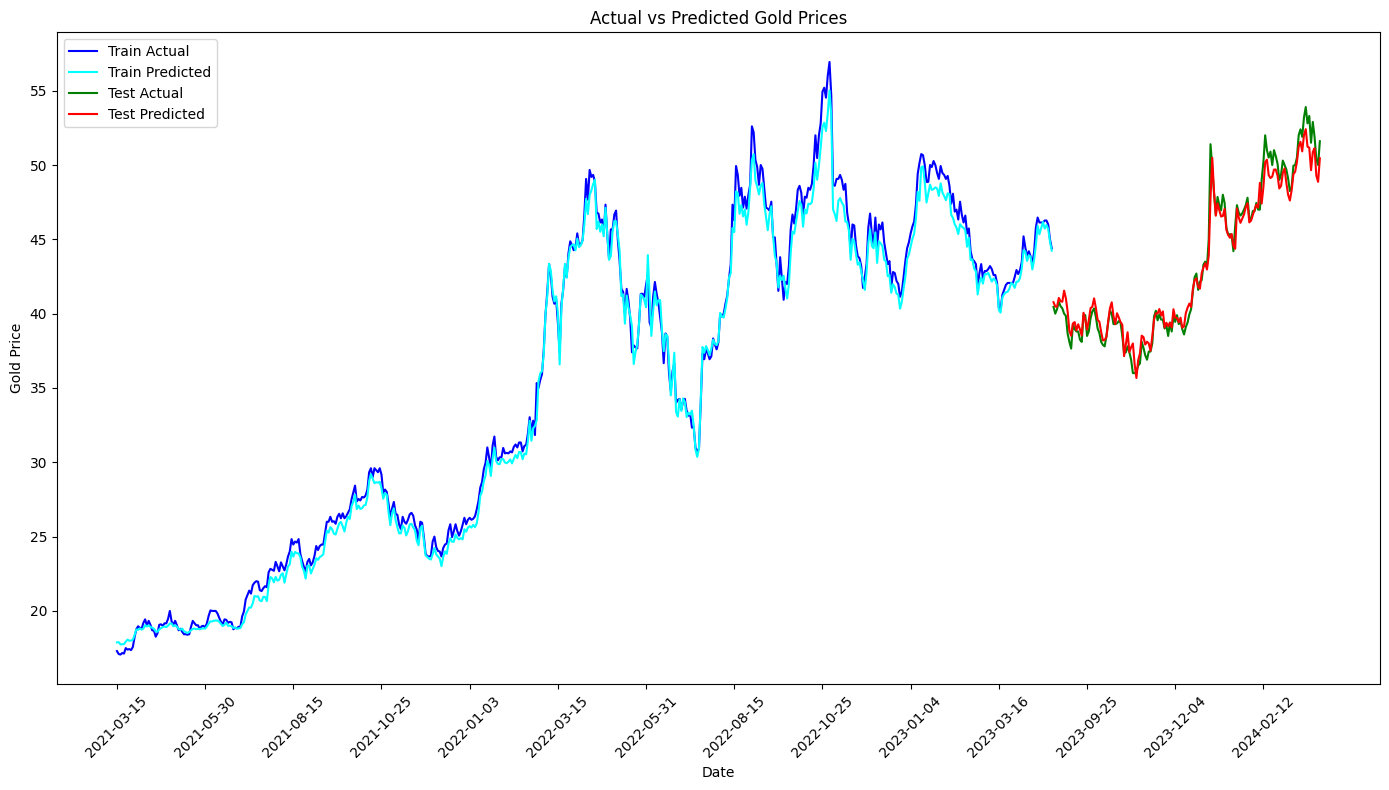

In [ ]:
plt.figure(figsize=(14, 8))


plt.plot(dates_train, results_train_df['Actual'], label='Train Actual', color='blue')
plt.plot(dates_train, results_train_df['Predicted'], label='Train Predicted', color='cyan')


plt.plot(dates_test, results_test_df['Actual'], label='Test Actual', color='green')
plt.plot(dates_test, results_test_df['Predicted'], label='Test Predicted', color='red')

plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()


dates_combined = list(dates_train) + list(dates_test)


plt.xticks(ticks=range(0, len(dates_combined), 50), labels=dates_combined[::50], rotation=45)

plt.tight_layout()
plt.show()

## comparing the results

In [ ]:
results = []

results.append({
    'Model': 'CNN-LSTM without sentiment',
    'MAPE': 2.65,
    'RMSE': 1.28
})


results.append({
    'Model': 'CNN-LSTM with sentiment',
    'MAPE': 1.38,
    'RMSE': 0.81
})


results_df = pd.DataFrame(results)

results_df.head()

Model  MAPE  RMSE
0  CNN-LSTM without sentiment  2.65  1.28
1     CNN-LSTM with sentiment  1.38  0.81